In [1]:
from bs4 import BeautifulSoup as bs
import requests

import pandas as pd

from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from webdriver_manager.firefox import GeckoDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys

import time

global languages

import os
import speech_recognition as sr
import urllib
import pydub


C:\Users\ofir8\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [ ]:
def not_robot_fn():

    #המתנה של 3 שניות
    time.sleep(5)

    # החלפה לפריים חדש
    iframe = driver.find_element(By.TAG_NAME, "iframe")
    driver.switch_to.frame(iframe)

    # מציאת לחצן ובדיקה
    cl = driver.find_element(By.CLASS_NAME, "recaptcha-checkbox-border").click()

    #המתנה של 5 שניות
    time.sleep(5)

    #מעבר לפריים חדש
    driver.switch_to.default_content()
    frames = driver.find_element(By.XPATH, "/html/body").find_elements(By.TAG_NAME, "iframe")
    driver.switch_to.frame(frames[-1])

    #המתנה עד מציאת לחצן המעבר לבדיקת האזנה
    wait = WebDriverWait(driver, 10)
    audio_button = wait.until(EC.element_to_be_clickable((By.ID, "recaptcha-audio-button")))
    audio_button.click()
    frames = driver.find_elements(By.TAG_NAME, "iframe")

    time.sleep(5)

    #מציאת לחצן ההורדת שמע
    download_button = driver.find_element(By.CLASS_NAME, "rc-audiochallenge-tdownload-link")
    download_button.click()

    src = driver.find_element(By.ID,"audio-source").get_attribute("src")
    print("[INFO] Audio src: %s"%src)

    #הורדת הקובץ קול מהאתר 
    urllib.request.urlretrieve(src, os.getcwd() + '\\sample.mp3')
    print('Downloaded file path:', os.getcwd() + '\\sample.mp3')
    time.sleep(5)
    sound.export(os.getcwd() + '\\sample.wav', format='wav')
    sample_audio = sr.AudioFile(os.getcwd() + '\\sample.wav')
    r = sr.Recognizer()
    with sample_audio as source:
        audio = r.record(source)



    #תרגום השמע לטקסט עם זיהוי קול של גוגל
    key = r.recognize_google(audio)
    print("[INFO] Recaptcha Passcode: %s"%key)



    #שליחת הטקסט כמפתח
    driver.find_element(By.ID, "audio-response").send_keys(key.lower())
    driver.find_element(By.ID, "audio-response").send_keys(Keys.ENTER)
    driver.switch_to.default_content()
    time.sleep(5)
    #submit_button = driver.find_element(By.ID, "recaptcha-demo-submit")
    #submit_button.click()
    time.sleep(5)

    #חזרה לפריים הרגיל
    driver.switch_to.default_content()

    return 


In [2]:
#הוצאת רשימת השפות מהאתר של וויקיפדיה
url = "https://en.wikipedia.org/wiki/List_of_programming_languages"
result = requests.get(url)
doc = bs(result.text, "html.parser")

#מציאת החלק שבו רשומות השפות והכנסת המילים לרשימה
lines = doc.find_all(class_="div-col")
languages = []
for line in lines:
    titles = line.find_all("a")
    for title in titles:
        full_title = title.get("title")
        trimmed_title = full_title.split("(")[0].strip()
        languages.append(trimmed_title)
        
print(languages)

['A Sharp', 'A-0 System', 'A+', 'ABAP', 'ABC', 'ABC ALGOL', 'ACC', 'Accent', 'Distributed Application Specification Language', 'Action!', 'ActionScript', 'Actor', 'Ada', 'ISO/IEC 8652', 'Adenine', 'AdvPL', 'Agda', 'Agilent VEE', 'Agora', 'AIMMS', 'Aldor', 'Alef', 'Algebraic Logic Functional programming language', 'ALGOL 58', 'ALGOL 60', 'ALGOL 68', 'ALGOL W', 'Alice', 'Alma-0', 'AmbientTalk', 'Amiga E', 'AMPL', 'Аналитик', 'AngelScript', 'Apache Pig', 'Apex', 'APL', 'App Inventor for Android', 'AppleScript', 'APT', 'Arc', 'ARexx', 'Argus', 'Assembly language', 'AutoHotkey', 'AutoIt', 'AutoLISP', 'Averest', 'AWK', 'Axum', 'B', 'Babbage', 'Ballerina', 'Bash', 'BASIC', 'Batch file', 'Bc', 'BCPL', 'BeanShell', 'BETA', 'BLISS', 'Blockly', 'BlooP and FlooP', 'Boo', 'Boomerang', 'Bosque', 'C', 'C--', 'C++', 'C*', 'C Sharp', 'C/AL', 'Caché ObjectScript', 'C Shell', 'Caml', 'Carbon', 'Catrobat', 'Cayenne', 'CDuce', 'Cecil', 'CESIL', 'Céu', 'Ceylon', 'CFEngine', 'Cg', 'Ch', 'Chapel', 'Charm', 'C

In [ ]:
#משיכת כמות שאלות לפי שפה מהאתר stack overflow
questions_num_on_sof = []


# אתחול השירות של דרייבר Firefox
service = Service(executable_path=GeckoDriverManager().install())

options = webdriver.FirefoxOptions()
options.set_preference("general.useragent.override", "Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

# אתחול הדרייבר של Selenium עם Firefox
driver = webdriver.Firefox(service=service, options=options)


#פתיחת הדף של stack overflow
driver.get('https://stackoverflow.com/')

time.sleep(5)
# בדיקה אם הכפתור "אישור קובצי Cookie" קיים ואז לחיצה עליו
try:
    accept_button = driver.find_element(By.CLASS_NAME, 'js-accept-cookies')
    if accept_button.is_displayed():
        ActionChains(driver).move_to_element(accept_button).click().perform()
except:
    pass

# מציאת אלמנט התפריט ופתיחתו
menu = driver.find_element(By.CSS_SELECTOR, "[aria-expanded='false']")
menu.click()

#מציאת שורת חיפוש
search_input = driver.find_element(By.NAME, 'q')

search_input.send_keys(Keys.CONTROL + "a")
wait = WebDriverWait(driver, 10)

# הקלדת המילות מפתח לחיפוש
for language in languages:
    try:
        search_input = driver.find_element(By.NAME, 'q')
        search_input.clear()
        search_input.send_keys("[" + language + "]")
        search_input.submit()
        time.sleep(5)
        #מציאת התוצאות והוספתם לרשימה
        num_questions = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, ".fs-body3.flex--item.fl1.mr12.sm\\:mr0.sm\\:mb12"))).text
        num_questions = num_questions.split(" ")[0].strip()
        questions_num_on_sof.append(num_questions)

    except TimeoutException:
        #במידה ויש בעיה ומבקשים הוכחת "אני לא רובוט" נריץ:
        #%run C:\\Users\\ofir8\\Desktop\\proj\\robot_test.ipynb
        not_robot_fn()

        time.sleep(5)
        num_questions = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, ".fs-body3.flex--item.fl1.mr12.sm\\:mr0.sm\\:mb12"))).text
        num_questions = num_questions.split(" ")[0].strip()
        questions_num_on_sof.append(num_questions)
        
time.sleep(5)
# סגירת הדפדפן
driver.quit()

In [ ]:
#משיכת כמות קורסים, מאמרים ומסמכים לפי שפה מהאתר codecademy

courses_num_on_codecademy = []
articles_num_on_codecademy = []
docs_num_on_codecademy = []

service = Service(executable_path=GeckoDriverManager().install())

options = webdriver.FirefoxOptions()
options.set_preference("general.useragent.override", "Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

# אתחול הדרייבר של Selenium עם Firefox
driver = webdriver.Firefox(service=service, options=options)


#פתיחת הדף של codecademy
driver.get('https://www.codecademy.com/learn')


time.sleep(3)
#פתיחת חלונית החיפוש וביצוע חיפוש ראשוני
search_b = driver.find_element(By.XPATH,'/html/body/div[1]/div/header/nav[1]/div/ul/li[7]/button').click()
search_input = driver.find_element(By.XPATH, '//*[@id="header-search-bar"]')
search_input.send_keys("a")
search_input.submit()


for language in languages:
    time.sleep(5)
    #ביצוע חיפוש לכל שפה
    search_input = driver.find_element(By.XPATH, '/html/body/div[1]/div/div[3]/div/main/form/input')
    search_input.send_keys(Keys.CONTROL + "a")
    search_input.send_keys(Keys.DELETE)
    search_input.send_keys(language)
    search_input.submit()
    time.sleep(7)

    try:
        #לנסות להוציא את כמות התוצאות חיפוש בכל קטגוריה
       Courses_num = driver.find_element(By.XPATH, "/html/body/div/div/div[3]/div/main/div/div[1]/button[1]/span").text
       Articles_num = driver.find_element(By.XPATH, "/html/body/div/div/div[3]/div/main/div/div[1]/button[2]/span").text
       Docs_num = driver.find_element(By.XPATH, "/html/body/div/div/div[3]/div/main/div/div[1]/button[3]/span").text
       Courses_num = Courses_num.split("(")[1].strip().split(")")[0].strip()
       Articles_num = Articles_num.split("(")[1].strip().split(")")[0].strip()
       Docs_num = Docs_num.split("(")[1].strip().split(")")[0].strip()

    except:
        #אחרת להזין 0 כי אין תוצאות רלוונטיות
       Courses_num = "0"
       Articles_num = "0"
       Docs_num = "0"
#הוספת התוצאות חיפוש לרשימה הסופית
    courses_num_on_codecademy.append(Courses_num)
    articles_num_on_codecademy.append(Articles_num)
    docs_num_on_codecademy.append(Docs_num)
    
time.sleep(5)
# סגירת הדפדפן
driver.quit()


In [ ]:
#משיכת נתונים לפי שפה מהאתר codeproject

articles_num_on_cp = []
Technical_Blogs_num_on_cp = []
Tips_and_Tricks_num_on_cp = []
Reference_Articles_num_on_cp = []
Projects_num_on_cp = []
Assets_num_on_cp = []
Questions_num_on_cp = []
Answers_num_on_cp = []
Forum_Messages_num_on_cp = []


service = Service(executable_path=GeckoDriverManager().install())

options = webdriver.FirefoxOptions()
options.set_preference("general.useragent.override", "Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

# אתחול הדרייבר של Selenium עם Firefox
driver = webdriver.Firefox(service=service, options=options)

#פתיחת הדף של codeproject
driver.get('https://www.codeproject.com/')

time.sleep(3)
#מציאת שורת חיפוש וביצוע חיפוש ראשוני
search_input = driver.find_element(By.NAME, "q")
search_input.send_keys("a")
time.sleep(5)
search_input.submit()

for language in languages:
    time.sleep(5)
    #ביצוע חיפוש לכל שפה
    search_input = driver.find_element(By.XPATH, '//*[@id="ctl00_MC_Query"]')
    search_input.send_keys(Keys.CONTROL + "a")
    search_input.send_keys(Keys.DELETE)
    search_input.send_keys(language)
    time.sleep(3)
    search_input.submit()
    time.sleep(7)
    
    i=0
#בכל שפה יש 9 קטגוריות לכן רצים על כלל הקטגוריות ומוציאים את כמות תוצאות החיפוש
    while i < 9:
        driver.find_element(By.ID, "ctl00_MC_Button1").click()
        driver.find_element(By.ID, "ctl00_MC_DocType_"+str(i)).click()
        time.sleep(5)
        driver.find_element(By.ID, "ctl00_MC_ApplyFilter").click()
        time.sleep(7)
        search_output = driver.find_element(By.XPATH, '//*[@id="ctl00_MC_NumberOfResults"]').text
        search_output = search_output.split(" ")[0].strip()
        
        if i == 0:
            articles_num_on_cp.append(search_output)
        if i == 1:
            Technical_Blogs_num_on_cp.append(search_output)
        if i == 2:
            Tips_and_Tricks_num_on_cp.append(search_output)
        if i == 3:
            Reference_Articles_num_on_cp.append(search_output)
        if i == 4:
            Projects_num_on_cp.append(search_output)
        if i == 5:
            Assets_num_on_cp.append(search_output)
        if i == 6:
            Questions_num_on_cp.append(search_output)
        if i == 7:
            Answers_num_on_cp.append(search_output)
        if i == 8:
            Forum_Messages_num_on_cp.append(search_output)
        i = i + 1

time.sleep(5)
# סגירת הדפדפן
driver.quit()

In [ ]:
#משיכת את כמות הקורסים לפי שפה מהאתר edx

cours_num_on_edx = []

service = Service(executable_path=GeckoDriverManager().install())

options = webdriver.FirefoxOptions()
options.set_preference("general.useragent.override", "Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

# אתחול הדרייבר של Selenium עם Firefox
driver = webdriver.Firefox(service=service, options=options)


#פתיחת הדף של edx
driver.get('https://www.edx.org/')
coockis_accept = driver.find_element(By.ID, 'onetrust-accept-btn-handler')


time.sleep(3)
#ביצוע חיפוש ראשוני פעמיים כי האתר בפעם הראשונה רק קופץ בלי לעשות חיפוש
search_input = driver.find_element(By.XPATH, '//*[@id="pgn-searchfield-input-28717"]')
search_input.send_keys("A")
search_input.submit()
time.sleep(3)
search_input = driver.find_element(By.XPATH, '//*[@id="pgn-searchfield-input-28717"]')
search_input.send_keys("A")
search_input.submit()

for language in languages:
    time.sleep(3)
    #ביצוע חיפוש לכל שפה
    search_input = driver.find_element(By.XPATH, '//*[@id="pgn-searchfield-input-33"]')
    time.sleep(1)
    search_input.clear()
    time.sleep(3)
    search_input.send_keys(language)
    time.sleep(3)
    search_input.submit()
    time.sleep(6)
    #מציאת כמות תוצאות חיפוש
    num_cours = driver.find_element(By.XPATH, "/html/body/div[1]/div[1]/div/main/div/div[4]/div[1]/div[1]/div/div").text
    num_cours = num_cours.split(" ")[0].strip()
    #אם אין תוצאות בדף יהיה רשום משפט המתחיל ב - NO
    if num_cours == "no":
        num_cours = "0"
        #הכנסת התוצאות לרשימה
    cours_num_on_edx.append(num_cours)
    
time.sleep(5)
# סגירת הדפדפן
driver.quit()

In [ ]:
#משיכת נתונים לפי שפה מהאתר github

questions_num_on_gh = []

service = Service(executable_path=GeckoDriverManager().install())

options = webdriver.FirefoxOptions()
options.set_preference("general.useragent.override", "Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

# אתחול הדרייבר של Selenium עם Firefox
driver = webdriver.Firefox(service=service, options=options)


#פתיחת הדף של github
driver.get('https://github.com/')

#מציאת תיבת חיפוש בפעם הראשונה 
search_input = driver.find_element(By.TAG_NAME, 'input')


for language in languages:
    time.sleep(5)
    #מציאת תיבת חיפוש לכל שפה
    search_input = driver.find_element(By.TAG_NAME, 'input')
    search_input.send_keys(Keys.CONTROL + "a")
    search_input.send_keys(Keys.DELETE)
    search_input.send_keys(language)
    search_input.submit()
    time.sleep(7)
    
    #מציאת כמות תוצאות חיפוש
    num_questions_gh = driver.find_element(By.XPATH, "/html/body/div[1]/div[4]/main/div/div[3]/div/div[1]/h3").text
    #ניקוי תוצאות החיפוש למספר בלבד
    num_questions = num_questions_gh.split(" ")[0].strip()
    #לפעמית התוצאות נראות קצת אחת לכן התאמתי פה לפי תבניות שמופיעות את הניקוי
    if num_questions == "Showing":
        num_questions = num_questions_gh.split(" ")[1].strip()
    else:
        if num_questions == "We":
            num_questions = "0"
    questions_num_on_gh.append(num_questions)

time.sleep(5)
# סגירת הדפדפן
driver.quit()

In [ ]:
#משיכת נתונים לפי שפה מהאתר glassdoor

job_num_on_gd = []

service = Service(executable_path=GeckoDriverManager().install())

options = webdriver.FirefoxOptions()
options.set_preference("general.useragent.override", "Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

# אתחול הדרייבר של Selenium עם Firefox
driver = webdriver.Firefox(service=service, options=options)


#פתיחת הדף של glassdoor
driver.get('https://www.glassdoor.com/member/home/index.htm')

#הזנת שם משפתש וסיסמה כאשר נכנסים לאתר
user_name = driver.find_element(By.NAME, 'username')
user_name.send_keys("ofirit@hit.ac.il")
user_name_submit = driver.find_element(By.NAME, 'submit')
user_name_submit.submit()
time.sleep(3)
Password_name = driver.find_element(By.NAME, 'password')
Password_name.send_keys("ofir8530")
Password_name_submit = driver.find_element(By.NAME, 'submit')
Password_name_submit.submit()

#ביצוע חיפוש ראשוני
time.sleep(3)
wait = WebDriverWait(driver, 10)
search_input = driver.find_element(By.NAME, 'sc.keyword')
time.sleep(3)
search_input.send_keys(languages[0])
search_input.submit()
time.sleep(3)
#מעבר לעמוד של חיפוש משרות 
try:
    job_element = wait.until(lambda driver: driver.find_element(By.CLASS_NAME, "mr-xxsm"))
    job_page = driver.find_elements(By.CLASS_NAME, "mr-xxsm")
    job_page[1].click()
    time.sleep(5)
    search_input = driver.find_element(By.NAME, 'sc.keyword')
    search_input.clear()
    loc_clear = driver.find_element(By.ID, "sc.location")
    loc_clear.clear()

except TimeoutException:
    pass
wait = WebDriverWait(driver, 10)

#חיפוש משרות לפי שפה
for language in languages:
        time.sleep(7)
        search_input = driver.find_element(By.NAME, 'sc.keyword')
        search_input.clear()
        search_input.send_keys(language)
        search_input.clear()
        search_input.send_keys(language)
        time.sleep(3)
        #ניקוי המיקום מהחיפוש
        loc_clear = driver.find_element(By.ID, "sc.location")
        loc_clear.clear()
        search_input.submit()
        time.sleep(10)
        
        try:
            #הוצאת כמות תוצאות
            job_num_gd = wait.until(EC.presence_of_element_located((By.XPATH, "/html/body/div[2]/div/div/div/div/div[2]/section/article/div[1]/div[1]/div/div/h1"))).text
        except:
            #יש שתי גרסאות לחיפוש לכן יש עוד דרך, המיקום גם משתנה
            job_num_gd = driver.find_element(By.XPATH,"/html/body/div[2]/div/div/div/div/div[2]/section/article/div[1]/div[2]/div/div[1]/p/span[2]").text
        job_num_gd = job_num_gd.split(" ")[0].strip()
        #במידה ואין תוצאות יצא משפט שמתחיל במילה -  YOUR
        if job_num_gd == "Your":
            job_num_gd = "0"
        #הכנסת התוצאות לרשימה
        job_num_on_gd.append(job_num_gd)

time.sleep(5)
# סגירת הדפדפן
driver.quit()

In [ ]:
#משיכת נתונים לפי שפה מהאתר indeed

courses_num_on_id = []

service = Service(executable_path=GeckoDriverManager().install())

options = webdriver.FirefoxOptions()
options.set_preference("general.useragent.override", "Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

# אתחול הדרייבר של Selenium עם Firefox
driver = webdriver.Firefox(service=service, options=options)


#פתיחת הדף של indeed
driver.get('https://il.indeed.com/?from=gnav-homepage')


time.sleep(3)
wait = WebDriverWait(driver, 10)
#מציאת שורת חיפוש
search_input = driver.find_element(By.ID, 'text-input-what')

for language in languages:
    time.sleep(5)
    #ביצוע חיפוש שכל שפה
    search_input = driver.find_element(By.ID, 'text-input-what')
    search_input.send_keys(Keys.CONTROL + "a")
    search_input.send_keys(Keys.DELETE)
    search_input.send_keys(language)
    search_input.submit()
    time.sleep(7)
    try:
        #משיכת כמות משורת שיצאו וניקוי על מנת לקבל רק את המספר 
        job_num = wait.until(EC.presence_of_element_located((By.XPATH, "/html/body/main/div/div[1]/div/div/div[5]/div[1]/div[4]/div/div/div[2]/span[1]"))).text
        job_num = job_num.split(" ")[0].strip()
    except:
        #במידה ואין תוצאות
        job_num = driver.find_element(By.XPATH, '/html/body/div[2]/div/div/div/div[1]/div/button').click()
        job_num = "0"
    #הוספת התוצאות לרשימה
    courses_num_on_id.append(job_num)

time.sleep(5)
# סגירת הדפדפן
driver.quit()

In [ ]:
#משיכת נתונים לפי שפה מהאתר spectrum

articles_num_on_spectrum = []

service = Service(executable_path=GeckoDriverManager().install())

options = webdriver.FirefoxOptions()
options.set_preference("general.useragent.override", "Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

# אתחול הדרייבר של Selenium עם Firefox
driver = webdriver.Firefox(service=service, options=options)


#פתיחת הדף של spectrum
driver.get('https://spectrum.ieee.org/')


time.sleep(3)
#מציאת שורת חיפוש
search_input = driver.find_element(By.ID, 'q')


for language in languages:
    time.sleep(5)
    #ביצוע חיפוש לכל שפה
    search_input = driver.find_element(By.ID, 'q')
    search_input.send_keys(Keys.CONTROL + "a")
    search_input.send_keys(Keys.DELETE)
    search_input.send_keys(language)
    search_input.submit()
    time.sleep(7)
    #מציאת הכמות מאמרים בכל שפה וניקוי על מנת לקבל רק את המספר
    search_output = driver.find_element(By.XPATH, '/html/body/div[4]/div/div[9]/div/div/div/p').text
    search_output = search_output.split(" ")[1].strip()
    #הוספת התוצאות לרשימה
    articles_num_on_spectrum.append(search_output)

time.sleep(5)
# סגירת הדפדפן
driver.quit()

In [ ]:
Business = []
Cyber_Security = []
Data_Science_and_AI_ML = []
Design = []
Development = []
IT_and_Software = []
Lifestyle = []
Marketing = []
Office_Productivity = []
Personal_Development = []
Programming_Languages = []
Teaching_and_Academics = []

service = Service(executable_path=GeckoDriverManager().install())

options = webdriver.FirefoxOptions()
options.set_preference("general.useragent.override", "Mozilla/5.0 (Windows NT 11.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

# אתחול הדרייבר של Selenium עם Firefox
driver = webdriver.Firefox(service=service, options=options)


#פתיחת הדף של github
driver.get('https://www.tutorialspoint.com/index.htm')



time.sleep(3)
search_input = driver.find_element(By.XPATH, '//*[@id="search-strings"]')

for language in languages:
    time.sleep(5)
    search_input = driver.find_element(By.XPATH, '//*[@id="search-strings"]')
    search_input.clear()
    search_input.send_keys(language)
    time.sleep(5)
    search_input.send_keys(Keys.ENTER)

    time.sleep(7)
    try:
        driver.find_element(By.XPATH, '/html/body/div[4]/div/div/div[1]/div/div/ul/li[1]/div/div/label[2]/input').click()
        output = driver.find_element(By.XPATH, '//*[@id="total"]').text
        output = output.split("(")[1].split(")")[0].strip()
    except:
        driver.refresh()
        driver.find_element(By.XPATH, '/html/body/div[4]/div/div/div[1]/div/div/ul/li[1]/div/div/label[2]/input').click()
        output = driver.find_element(By.XPATH, '//*[@id="total"]').text
        output = output.split("(")[1].split(")")[0].strip()


    if output == "0":
        Business.append(output)
        Cyber_Security.append(output)
        Data_Science_and_AI_ML.append(output)
        Design.append(output)
        Development.append(output)
        IT_and_Software.append(output)
        Lifestyle.append(output)
        Marketing.append(output)
        Office_Productivity.append(output)
        Personal_Development.append(output)
        Programming_Languages.append(output)
        Teaching_and_Academics.append(output)

    else:

        time.sleep(5)
        try:
            driver.find_element(By.XPATH, '//*[@id="81"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Business.append(output)
            driver.find_element(By.XPATH, '//*[@id="81"]').click()
        except:
            driver.refresh()
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="81"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Business.append(output)
            driver.find_element(By.XPATH, '//*[@id="81"]').click()
        try:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="153"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Cyber_Security.append(output)
            driver.find_element(By.XPATH, '//*[@id="153"]').click()
        except:
            driver.refresh()
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="153"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Cyber_Security.append(output)
            driver.find_element(By.XPATH, '//*[@id="153"]').click()

        try:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="158"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Data_Science_and_AI_ML.append(output)
            driver.find_element(By.XPATH, '//*[@id="158"]').click()
        except:
            driver.refresh()
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="158"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Data_Science_and_AI_ML.append(output)
            driver.find_element(By.XPATH, '//*[@id="158"]').click()

        try:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="166"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Design.append(output)
            driver.find_element(By.XPATH, '//*[@id="166"]').click()
        except:
            driver.refresh()
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="166"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Design.append(output)
            driver.find_element(By.XPATH, '//*[@id="166"]').click()

        try:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="755"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Development.append(output)
            driver.find_element(By.XPATH, '//*[@id="755"]').click()
        except:
            driver.refresh()
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="755"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Development.append(output)
            driver.find_element(By.XPATH, '//*[@id="755"]').click()

        try:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="332"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            IT_and_Software.append(output)
            driver.find_element(By.XPATH, '//*[@id="332"]').click()
        except:
            driver.refresh()
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="332"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            IT_and_Software.append(output)
            driver.find_element(By.XPATH, '//*[@id="332"]').click()

        try:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="368"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Lifestyle.append(output)
            driver.find_element(By.XPATH, '//*[@id="368"]').click()
        except:
            driver.refresh()
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="368"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Lifestyle.append(output)
            driver.find_element(By.XPATH, '//*[@id="368"]').click()

        try:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="391"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Marketing.append(output)
            driver.find_element(By.XPATH, '//*[@id="391"]').click()
        except:
            driver.refresh()
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="391"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Marketing.append(output)
            driver.find_element(By.XPATH, '//*[@id="391"]').click()

        try:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="455"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Office_Productivity.append(output)
            driver.find_element(By.XPATH, '//*[@id="455"]').click()
        except:
            driver.refresh()
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="455"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Office_Productivity.append(output)
            driver.find_element(By.XPATH, '//*[@id="455"]').click()

        try:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="484"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Personal_Development.append(output)
            driver.find_element(By.XPATH, '//*[@id="484"]').click()
        except:
            driver.refresh()
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="484"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Personal_Development.append(output)
            driver.find_element(By.XPATH, '//*[@id="484"]').click()

        try:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="549"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Programming_Languages.append(output)
            driver.find_element(By.XPATH, '//*[@id="549"]').click()
        except:
            driver.refresh()
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="549"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            output = output.split("(")[1].split(")")[0].strip()
            Programming_Languages.append(output)
            driver.find_element(By.XPATH, '//*[@id="549"]').click()

        try:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="683"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            ooutput = output.split("(")[1].split(")")[0].strip()
            Teaching_and_Academics.append(output)
            driver.find_element(By.XPATH, '//*[@id="683"]').click()
        except:
            driver.refresh()
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="683"]').click()
            time.sleep(5)
            output = driver.find_element(By.XPATH, '//*[@id="total"]').text
            ooutput = output.split("(")[1].split(")")[0].strip()
            Teaching_and_Academics.append(output)
            driver.find_element(By.XPATH, '//*[@id="683"]').click()



data_tp = {"Business_num_on_tp" : Business}
df = pd.DataFrame(data_tp)
df.to_csv('data_tp_bus.csv', index=False)
print(df)

data_tp = {"Cyber_Security_num_on_tp" : Cyber_Security}
df = pd.DataFrame(data_tp)
df.to_csv('data_tp_cyb.csv', index=False)
print(df)

data_tp = { "Data_Science_and_AI_ML_num_on_tp" : Data_Science_and_AI_ML}
df = pd.DataFrame(data_tp)
df.to_csv('data_tp_data.csv', index=False)

print(df)
data_tp = {"Design_num_on_tp" : Design,}
df = pd.DataFrame(data_tp)
df.to_csv('data_tp_das.csv', index=False)
print(df)
data_tp = {"Development_num_on_tp" : Development}
df = pd.DataFrame(data_tp)
df.to_csv('data_tp_dev.csv', index=False)
print(df)
data_tp = {"IT_and_Software_num_on_tp" : IT_and_Software}
df = pd.DataFrame(data_tp)
df.to_csv('data_tp_it.csv', index=False)
print(df)
data_tp = {"Lifestyle_num_on_tp" : Lifestyle}
df = pd.DataFrame(data_tp)
df.to_csv('data_tp_life.csv', index=False)
print(df)
data_tp = {"Marketing_num_on_tp" : Marketing}
df = pd.DataFrame(data_tp)
df.to_csv('data_tp_mar.csv', index=False)
print(df)
data_tp = {"Office_Productivity_num_on_tp" : Office_Productivity}
df = pd.DataFrame(data_tp)
df.to_csv('data_tp_off.csv', index=False)
print(df)
data_tp = {"Personal_Development_num_on_tp" : Personal_Development}
df = pd.DataFrame(data_tp)
df.to_csv('data_tp_per.csv', index=False)
print(df)
data_tp = {"Programming_Languages_num_on_tp" : Programming_Languages}
df = pd.DataFrame(data_tp)
df.to_csv('data_tp_pro.csv', index=False)
print(df)
data_tp = {"Teaching_and_Academics_num_on_tp" : Teaching_and_Academics}
df = pd.DataFrame(data_tp)
df.to_csv('data_tp_tec.csv', index=False)
print(df)

time.sleep(5)
# סגירת הדפדפן
driver.quit()




[WDM] - Downloading: 19.2kB [00:00, ?B/s]                       
[WDM] - Downloading: 100%|██████████| 1.59M/1.59M [00:00<00:00, 3.53MB/s]


In [ ]:
#יצירת הדאתא פריים מכל הרשימות שיצרנו

data = {"languages": languages, "questions_num_on_sof":questions_num_on_sof, "questions_num_on_gh":questions_num_on_gh,
        "cours_num_on_edx":cours_num_on_edx, "job_num_on_gd":job_num_on_gd, "articles_num_on_cp":articles_num_on_cp,
        "Technical_Blogs_num_on_cp":Technical_Blogs_num_on_cp,"Tips_and_Tricks_num_on_cp":Tips_and_Tricks_num_on_cp,
        "Reference_Articles_num_on_cp":Reference_Articles_num_on_cp,"Projects_num_on_cp":Projects_num_on_cp,
        "Assets_num_on_cp":Assets_num_on_cp,"Questions_num_on_cp":Questions_num_on_cp,"Answers_num_on_cp":Answers_num_on_cp,
        "Forum_Messages_num_on_cp":Forum_Messages_num_on_cp,"articles_num_on_spectrum":articles_num_on_spectrum,
        "courses_num_on_id":courses_num_on_id,"Business_num_on_tp":Business_num_on_tp,"Cyber_Security_num_on_tp":Cyber_Security_num_on_tp,
        "Data_Science_and_AI_ML_num_on_tp":Data_Science_and_AI_ML_num_on_tp,"Design_num_on_tp":Design_num_on_tp,
        "Development_num_on_tp":Development_num_on_tp,"IT_and_Software_num_on_tp":IT_and_Software_num_on_tp,
        "Lifestyle_num_on_tp":Lifestyle_num_on_tp,"Marketing_num_on_tp":Marketing_num_on_tp,"Office_Productivity_num_on_tp":Office_Productivity_num_on_tp,
        "Personal_Development_num_on_tp":Personal_Development_num_on_tp,"Programming_Languages_num_on_tp":Programming_Languages_num_on_tp,
        "Teaching_and_Academics_num_on_tp":Teaching_and_Academics_num_on_tp,"courses_num_on_codecademy":courses_num_on_codecademy,
        "articles_num_on_codecademy":articles_num_on_codecademy, "docs_num_on_codecademy":docs_num_on_codecademy}

df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)
df.to_csv('data.csv')
print(df)



In [19]:
import pandas as pd

In [20]:
# טעינת המסגרות הנתונים מהקבצים
df0 = pd.read_csv('data_languages.csv')
df1 = pd.read_csv('data_cp.csv')
df2 = pd.read_csv('data_cca.csv')
df3 = pd.read_csv('data_edx.csv')
df4 = pd.read_csv('data_ID.csv')
df5 = pd.read_csv('data_spt.csv')
df6 = pd.read_csv('data_GD.csv')

# חיבור המסגרות הנתונים בעמודות
merged_df = pd.concat([df0,df1, df2, df3, df4, df5,df6], axis=1)
merged_df.to_csv('all_data.csv')



In [21]:
df = pd.read_csv('all_data.csv')
df

Unnamed: 0.1   languages  Unnamed: 0 articles_num_on_cp  \
0               0     A Sharp         0.0                264   
1               1  A-0 System         1.0             17,788   
2               2          A+         2.0                 48   
3               3        ABAP         3.0                  8   
4               4         ABC         4.0                391   
..            ...         ...         ...                ...   
689           689      Zonnon       689.0                  0   
690           690        ZOPL       690.0                  0   
691           691         ZPL       691.0                  2   
692           692         Z++       692.0                 30   
693           693         NaN         NaN                NaN   

    Technical_Blogs_num_on_cp Tips_and_Tricks_num_on_cp  \
0                          36                        27   
1                       3,040                     2,328   
2                           7                         4   
3                           2                         0   
4                          63                        55   
..                        ...                       ...   
689                         0                         0   
690                         0                         0   
691                         0                         0   
692                         1                         7   
693                       NaN                       NaN   

    Reference_Articles_num_on_cp Projects_num_on_cp Assets_num_on_cp  \
0                              1                  3                0   
1                             20                 43                0   
2                              0                  0                0   
3                              0                  0                0   
4                              1                  2                0   
..                           ...                ...              ...   
689                            0                  0                0   
690                            0                  0                0   
691                            0                  0                0   
692                            0                  0                0   
693                          NaN                NaN              NaN   

    Questions_num_on_cp Answers_num_on_cp Forum_Messages_num_on_cp  \
0                   967             1,093                    6,960   
1                24,282            23,510                  198,118   
2                   145                67                      361   
3                    15                12                       87   
4                 2,288             1,228                    3,813   
..                  ...               ...                      ...   
689                   0                 0                        0   
690                   0                 0                        1   
691                  17                25                       24   
692                  80                34                       34   
693                 NaN               NaN                      NaN   

     courses_num_on_codecademy  articles_num_on_codecademy  \
0                          8.0                         1.0   
1                         37.0                        10.0   
2                        247.0                       250.0   
3                          0.0                         0.0   
4                          0.0                         0.0   
..                         ...                         ...   
689                        0.0                         0.0   
690                        0.0                         0.0   
691                        0.0                         0.0   
692                        0.0                         5.0   
693                        NaN                         NaN   

     docs_num_on_codecademy cours_num_on_edx courses_num_on_id  \
0         

In [22]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis =1)
rows_to_drop  = [693,50,54,66,132,150,180,264,289,446,509,517,540,612]
df.drop(index=rows_to_drop, inplace=True)
df = df.rename(columns={'courses_num_on_id': 'job_num_on_id'})
df

languages articles_num_on_cp Technical_Blogs_num_on_cp  \
0       A Sharp                264                        36   
1    A-0 System             17,788                     3,040   
2            A+                 48                         7   
3          ABAP                  8                         2   
4           ABC                391                        63   
..          ...                ...                       ...   
688         Zig                  5                         1   
689      Zonnon                  0                         0   
690        ZOPL                  0                         0   
691         ZPL                  2                         0   
692         Z++                 30                         1   

    Tips_and_Tricks_num_on_cp Reference_Articles_num_on_cp Projects_num_on_cp  \
0                          27                            1                  3   
1                       2,328                           20                 43   
2                           4                            0                  0   
3                           0                            0                  0   
4                          55                            1                  2   
..                        ...                          ...                ...   
688                         0                            0                  0   
689                         0                            0                  0   
690                         0                            0                  0   
691                         0                            0                  0   
692                         7                            0                  0   

    Assets_num_on_cp Questions_num_on_cp Answers_num_on_cp  \
0                  0                 967             1,093   
1                  0              24,282            23,510   
2                  0                 145                67   
3                  0                  15                12   
4                  0               2,288             1,228   
..               ...                 ...               ...   
688                0                   4                 1   
689                0                   0                 0   
690                0                   0                 0   
691                0                  17                25   
692                0                  80                34   

    Forum_Messages_num_on_cp  courses_num_on_codecademy  \
0                      6,960                        8.0   
1                    198,118                       37.0   
2                        361                      247.0   
3                         87                        0.0   
4                      3,813                        0.0   
..                       ...                        ...   
688                    1,774                        0.0   
689                        0                        0.0   
690                        1                        0.0   
691                       24                        0.0   
692                       34                        0.0   

     articles_num_on_codecademy  docs_num_on_codecademy cours_num_on_edx  \
0                           1.0                    25.0              541   
1                          10.0                    32.0               No   
2                         250.0                   250.0             3863   
3                           0.0                     0.0              261   
4                           0.0                     8.0                3   
..                          ...                     ...              ...   
688                         0.0                     0.0                1   
689                         0.0                     0.0                5   
690                         0.0                     0.0                8   
691                         0.0                   

In [23]:
df.shape

(680, 17)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 692
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   languages                     680 non-null    object 
 1   articles_num_on_cp            680 non-null    object 
 2   Technical_Blogs_num_on_cp     679 non-null    object 
 3   Tips_and_Tricks_num_on_cp     679 non-null    object 
 4   Reference_Articles_num_on_cp  679 non-null    object 
 5   Projects_num_on_cp            680 non-null    object 
 6   Assets_num_on_cp              678 non-null    object 
 7   Questions_num_on_cp           678 non-null    object 
 8   Answers_num_on_cp             678 non-null    object 
 9   Forum_Messages_num_on_cp      679 non-null    object 
 10  courses_num_on_codecademy     680 non-null    float64
 11  articles_num_on_codecademy    680 non-null    float64
 12  docs_num_on_codecademy        680 non-null    float64
 13  cours

In [25]:
df = df.fillna(0)
df.replace('No', 0, inplace=True)


In [26]:
df.shape


(680, 17)

In [30]:
# המרת העמודות לערכים מספריים שלמים
int_columns = ['articles_num_on_cp', 'Technical_Blogs_num_on_cp', 'Tips_and_Tricks_num_on_cp',
               'Reference_Articles_num_on_cp', 'Projects_num_on_cp', 'Assets_num_on_cp',
               'Questions_num_on_cp', 'Answers_num_on_cp', 'Forum_Messages_num_on_cp',
               'cours_num_on_edx', 'job_num_on_id']

# מילוי ערכים NaN בעמודות המספריות בערך מסוים (לדוגמה, 0)
#df[int_columns] = df[int_columns].fillna(0)

for column in int_columns:
    df[column] = df[column].apply(lambda x: 0 if x == 'NO' else int(str(x).replace(',', '')))



df

languages  articles_num_on_cp  Technical_Blogs_num_on_cp  \
0       A Sharp                 264                         36   
1    A-0 System               17788                       3040   
2            A+                  48                          7   
3          ABAP                   8                          2   
4           ABC                 391                         63   
..          ...                 ...                        ...   
688         Zig                   5                          1   
689      Zonnon                   0                          0   
690        ZOPL                   0                          0   
691         ZPL                   2                          0   
692         Z++                  30                          1   

     Tips_and_Tricks_num_on_cp  Reference_Articles_num_on_cp  \
0                           27                             1   
1                         2328                            20   
2                            4                             0   
3                            0                             0   
4                           55                             1   
..                         ...                           ...   
688                          0                             0   
689                          0                             0   
690                          0                             0   
691                          0                             0   
692                          7                             0   

     Projects_num_on_cp  Assets_num_on_cp  Questions_num_on_cp  \
0                     3                 0                  967   
1                    43                 0                24282   
2                     0                 0                  145   
3                     0                 0                   15   
4                     2                 0                 2288   
..                  ...               ...                  ...   
688                   0                 0                    4   
689                   0                 0                    0   
690                   0                 0                    0   
691                   0                 0                   17   
692                   0                 0                   80   

     Answers_num_on_cp  Forum_Messages_num_on_cp  courses_num_on_codecademy  \
0                 1093                      6960                        8.0   
1                23510                    198118                       37.0   
2                   67                       361                      247.0   
3                   12                        87                        0.0   
4                 1228                      3813                        0.0   
..                 ...                       ...                        ...   
688                  1                      1774                        0.0   
689                  0                         0                        0.0   
690                  0                         1                        0.0   
691                 25                        24                        0.0   
692                 34                        34                        0.0   

     articles_num_on_codecademy  docs_num_on_codecademy  cours_num_on_edx  \
0                           1.0                    25.0               541   
1                          10.0                    32.0                 0   
2                         250.0                   250.0              3863   
3                           0.0                     0.0               261   
4                           0.0                     8.0                 3   
..                          ...                     ...               ...   
688                         0.0                     0.0                 1   
689                         0.0                     0.0                 5   
690      

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 692
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   languages                     680 non-null    object 
 1   articles_num_on_cp            680 non-null    int64  
 2   Technical_Blogs_num_on_cp     680 non-null    int64  
 3   Tips_and_Tricks_num_on_cp     680 non-null    int64  
 4   Reference_Articles_num_on_cp  680 non-null    int64  
 5   Projects_num_on_cp            680 non-null    int64  
 6   Assets_num_on_cp              680 non-null    int64  
 7   Questions_num_on_cp           680 non-null    int64  
 8   Answers_num_on_cp             680 non-null    int64  
 9   Forum_Messages_num_on_cp      680 non-null    int64  
 10  courses_num_on_codecademy     680 non-null    float64
 11  articles_num_on_codecademy    680 non-null    float64
 12  docs_num_on_codecademy        680 non-null    float64
 13  cours

In [33]:
sum_column = df['courses_num_on_codecademy'] + df['cours_num_on_edx']
sum_column_articles = df['articles_num_on_spectrum'] + df['articles_num_on_codecademy'] + df['articles_num_on_cp']
sum_column_job = df["job_num_on_id"] + df["job_num_on_gd"]
sum_column_all = df['job_num_on_gd'] + df['articles_num_on_cp'] + df['Technical_Blogs_num_on_cp'] + df['Tips_and_Tricks_num_on_cp']+df['Reference_Articles_num_on_cp'] + df['Projects_num_on_cp'] + df['Assets_num_on_cp']+df['Questions_num_on_cp'] + df['Answers_num_on_cp'] + df['Forum_Messages_num_on_cp']+df['courses_num_on_codecademy'] + df['articles_num_on_codecademy'] + df['docs_num_on_codecademy']+df['cours_num_on_edx'] + df['job_num_on_id'] + df['articles_num_on_spectrum']
df['lang_courses'] = sum_column
df['lang_articles'] = sum_column_articles
df['lang_job'] = sum_column_job
df['all_search'] = sum_column_all


In [34]:
df.describe()

articles_num_on_cp  Technical_Blogs_num_on_cp  \
count          680.000000                 680.000000   
mean          3996.123529                1657.532353   
std           9227.195037               25110.656142   
min              0.000000                   0.000000   
25%              0.000000                   0.000000   
50%             15.000000                   2.000000   
75%            625.750000                 109.250000   
max          40285.000000              654107.000000   

       Tips_and_Tricks_num_on_cp  Reference_Articles_num_on_cp  \
count                 680.000000                    680.000000   
mean                 1012.176471                    969.429412   
std                  7969.626579                  24518.101032   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     1.500000                      0.000000   
75%                    58.000000                      1.000000   
max                203039.000000                 639256.000000   

       Projects_num_on_cp  Assets_num_on_cp  Questions_num_on_cp  \
count          680.000000        680.000000           680.000000   
mean            25.050000          9.597059         16106.791176   
std            290.837819        248.801402         49148.720495   
min              0.000000          0.000000             0.000000   
25%              0.000000          0.000000             0.000000   
50%              0.000000          0.000000            11.000000   
75%              2.000000          0.000000           508.500000   
max           6488.000000       6488.000000        233305.000000   

       Answers_num_on_cp  Forum_Messages_num_on_cp  courses_num_on_codecademy  \
count         680.000000              6.800000e+02                 680.000000   
mean        22464.161765              8.044820e+04                   6.038235   
std         71743.909135              2.956736e+05                  20.850651   
min             0.000000              0.000000e+00                   0.000000   
25%             0.000000              1.000000e+01                   0.000000   
50%             9.000000              2.560000e+02                   0.000000   
75%           578.500000              8.166750e+03                   3.000000   
max        330245.000000              4.716417e+06                 248.000000   

       articles_num_on_codecademy  docs_num_on_codecademy  cours_num_on_edx  \
count                  680.000000              680.000000        680.000000   
mean                    13.869118               18.751471        183.486765   
std                     36.122345               48.716894        486.263043   
min                      0.000000                0.000000          0.000000   
25%                      0.000000                0.000000          0.000000   
50%                      1.000000                1.000000          4.000000   
75%                      9.000000               10.000000         99.000000   
max                    250.000000              250.000000       4115.000000   

       job_num_on_id  articles_num_on_spectrum  job_num_on_gd  lang_courses  \
count     680.000000                680.000000   6.800000e+02     680.00000   
mean       52.054412                227.716176   1.296333e+04     189.52500   
std       316.566356               1143.361047   1.206665e+05     493.43015   
min         0.000000                  0.000000   0.000000e+00       0.00000   
25%         0.000000                  0.000000   0.000000e+00       1.00000   
50%         0.000000                  3.000000   2.000000e+01       9.00000   
75%         1.000000                 48.000000   5.410000e+02     113.00000   
max      3934.000000              19259.000000   2.490497e+06    4140.00000   

       lang_articles      lang_job    all_search  
count     680.000000  6.800000e+02  6.800000e+02  
mean     4237.708824  1.301538e+04  1.

In [35]:
df.to_csv('data_cleaned.csv', index=False)


In [24]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [25]:
df = pd.read_csv('data_cleaned.csv')
df

languages  articles_num_on_cp  Technical_Blogs_num_on_cp  \
0       A Sharp                 264                         36   
1    A-0 System               17788                       3040   
2            A+                  48                          7   
3          ABAP                   8                          2   
4           ABC                 391                         63   
..          ...                 ...                        ...   
675         Zig                   5                          1   
676      Zonnon                   0                          0   
677        ZOPL                   0                          0   
678         ZPL                   2                          0   
679         Z++                  30                          1   

     Tips_and_Tricks_num_on_cp  Reference_Articles_num_on_cp  \
0                           27                             1   
1                         2328                            20   
2                            4                             0   
3                            0                             0   
4                           55                             1   
..                         ...                           ...   
675                          0                             0   
676                          0                             0   
677                          0                             0   
678                          0                             0   
679                          7                             0   

     Projects_num_on_cp  Assets_num_on_cp  Questions_num_on_cp  \
0                     3                 0                  967   
1                    43                 0                24282   
2                     0                 0                  145   
3                     0                 0                   15   
4                     2                 0                 2288   
..                  ...               ...                  ...   
675                   0                 0                    4   
676                   0                 0                    0   
677                   0                 0                    0   
678                   0                 0                   17   
679                   0                 0                   80   

     Answers_num_on_cp  Forum_Messages_num_on_cp  ...  \
0                 1093                      6960  ...   
1                23510                    198118  ...   
2                   67                       361  ...   
3                   12                        87  ...   
4                 1228                      3813  ...   
..                 ...                       ...  ...   
675                  1                      1774  ...   
676                  0                         0  ...   
677                  0                         1  ...   
678                 25                        24  ...   
679                 34                        34  ...   

     articles_num_on_codecademy  docs_num_on_codecademy  cours_num_on_edx  \
0                           1.0                    25.0               541   
1                          10.0                    32.0                 0   
2                         250.0                   250.0              3863   
3                           0.0                     0.0               261   
4                           0.0                     8.0                 3   
..                          ...                     ...               ...   
675                         0.0                     0.0                 1   
676                         0.0                     0.0                 5   
677                         0.0                     0.0                 8   
678                         0.0                     0.0                 0   
679                         5.0                    25.0                18   

     job_num_on_id  articles_num_on_spect

In [26]:
df.head()

languages  articles_num_on_cp  Technical_Blogs_num_on_cp  \
0     A Sharp                 264                         36   
1  A-0 System               17788                       3040   
2          A+                  48                          7   
3        ABAP                   8                          2   
4         ABC                 391                         63   

   Tips_and_Tricks_num_on_cp  Reference_Articles_num_on_cp  \
0                         27                             1   
1                       2328                            20   
2                          4                             0   
3                          0                             0   
4                         55                             1   

   Projects_num_on_cp  Assets_num_on_cp  Questions_num_on_cp  \
0                   3                 0                  967   
1                  43                 0                24282   
2                   0                 0                  145   
3                   0                 0                   15   
4                   2                 0                 2288   

   Answers_num_on_cp  Forum_Messages_num_on_cp  ...  \
0               1093                      6960  ...   
1              23510                    198118  ...   
2                 67                       361  ...   
3                 12                        87  ...   
4               1228                      3813  ...   

   articles_num_on_codecademy  docs_num_on_codecademy  cours_num_on_edx  \
0                         1.0                    25.0               541   
1                        10.0                    32.0                 0   
2                       250.0                   250.0              3863   
3                         0.0                     0.0               261   
4                         0.0                     8.0                 3   

   job_num_on_id  articles_num_on_spectrum  job_num_on_gd  lang_courses  \
0            113                       492          637.0         549.0   
1              0                      1458            0.0          37.0   
2             25                         0      2490497.0        4110.0   
3             75                         0          858.0         261.0   
4             10                        86         2240.0           3.0   

   lang_articles   lang_job  all_search  
0          757.0      750.0     11168.0  
1        19256.0        0.0    270666.0  
2          298.0  2490522.0   2495764.0  
3            8.0      933.0      1318.0  
4          477.0     2250.0     10188.0  

[5 rows x 21 columns]

In [27]:
df.columns

Index(['languages', 'articles_num_on_cp', 'Technical_Blogs_num_on_cp',
       'Tips_and_Tricks_num_on_cp', 'Reference_Articles_num_on_cp',
       'Projects_num_on_cp', 'Assets_num_on_cp', 'Questions_num_on_cp',
       'Answers_num_on_cp', 'Forum_Messages_num_on_cp',
       'courses_num_on_codecademy', 'articles_num_on_codecademy',
       'docs_num_on_codecademy', 'cours_num_on_edx', 'job_num_on_id',
       'articles_num_on_spectrum', 'job_num_on_gd', 'lang_courses',
       'lang_articles', 'lang_job', 'all_search'],
      dtype='object')

In [28]:
# מיון המידע מהגדול לקטן בכל העמודות
df_sorted = df.sort_values(by=[ 'articles_num_on_cp', 'Technical_Blogs_num_on_cp',
       'Tips_and_Tricks_num_on_cp', 'Reference_Articles_num_on_cp',
       'Projects_num_on_cp', 'Assets_num_on_cp', 'Questions_num_on_cp',
       'Answers_num_on_cp', 'Forum_Messages_num_on_cp',
       'courses_num_on_codecademy', 'articles_num_on_codecademy',
       'docs_num_on_codecademy', 'cours_num_on_edx', 'job_num_on_id',
       'articles_num_on_spectrum', 'job_num_on_gd'], axis=0, ascending=False)

# הדפסת המידע הממויין
df_sorted


languages  articles_num_on_cp  \
336                                     Machine code               40285   
554                                       Short Code               40091   
22   Algebraic Logic Functional programming language               40077   
445    Programming language for Computable Functions               39999   
609              Text Executive Programming Language               39304   
..                                               ...                 ...   
574                                        SOPHAEROS                   0   
588                                         Starlogo                   0   
601                                           TACPOL                   0   
659                                            XOTcl                   0   
660                                              XOD                   0   

     Technical_Blogs_num_on_cp  Tips_and_Tricks_num_on_cp  \
336                       7666                       8427   
554                       7492                       8384   
22                        7410                       8641   
445                       7345                       8639   
609                       7231                       8645   
..                         ...                        ...   
574                          0                          0   
588                          0                          0   
601                          0                          0   
659                          0                          0   
660                          0                          0   

     Reference_Articles_num_on_cp  Projects_num_on_cp  Assets_num_on_cp  \
336                            34                  95                 1   
554                            34                  95                 1   
22                             32                  96                 1   
445                            34                  97                 1   
609                            35                  92                 1   
..                            ...                 ...               ...   
574                             0                   0                 0   
588                             0                   0                 0   
601                             0                   0                 0   
659                             0                   0                 0   
660                             0                   0                 0   

     Questions_num_on_cp  Answers_num_on_cp  Forum_Messages_num_on_cp  ...  \
336               130679             132653                    913281  ...   
554               127084             129402                    870565  ...   
22                227246             329815                   1559896  ...   
445               228413             329924                   1628686  ...   
609               233305             330245                   1533677  ...   
..                   ...                ...                       ...  ...   
574                    0                  0                         0  ...   
588                    0                  0                         0  ...   
601                    0                  0                         0  ...   
659                    0                  0                         0  ...   
660                    0                  0                         0  ...   

     articles_num_on_codecademy  docs_num_on_codecademy  cours_num_on_edx  \
336                        33.0                    23.0               177   
554                        34.0                    16.0               158   
22                          3.0                     1.0                 0   
445                         1.0                     1.0                 0   
609                         7.0                     1.0                 4   
..                          ...                     ...               ...   
574                 

In [29]:
# מיון המידע מהגדול לקטן לפי העמדות המסכמות
df_sorted = df.sort_values(by=[ 'lang_courses', 'lang_articles','lang_job'], axis=0, ascending=False)

# הדפסת המידע הממויין
df_sorted


languages  articles_num_on_cp  Technical_Blogs_num_on_cp  \
64        C--                   5                          2   
2          A+                  48                          7   
249      Icon                3802                        444   
303      Lean                 254                         78   
616      TRAC                   5                          1   
..        ...                 ...                        ...   
601    TACPOL                   0                          0   
643    WATFIV                   0                          0   
659     XOTcl                   0                          0   
660       XOD                   0                          0   
668    Yorick                   0                          1   

     Tips_and_Tricks_num_on_cp  Reference_Articles_num_on_cp  \
64                           0                             0   
2                            4                             0   
249                        341                             2   
303                         16                             0   
616                          0                             0   
..                         ...                           ...   
601                          0                             0   
643                          0                             0   
659                          0                             0   
660                          0                             0   
668                          0                             0   

     Projects_num_on_cp  Assets_num_on_cp  Questions_num_on_cp  \
64                    0                 0                   19   
2                     0                 0                  145   
249                   6                 0                 2477   
303                   0                 0                   55   
616                   0                 0                   12   
..                  ...               ...                  ...   
601                   0                 0                    0   
643                   0                 0                    0   
659                   0                 0                    0   
660                   0                 0                    0   
668                   0                 0                    0   

     Answers_num_on_cp  Forum_Messages_num_on_cp  ...  \
64                  13                        33  ...   
2                   67                       361  ...   
249               1678                     36371  ...   
303                131                      3817  ...   
616                 22                       288  ...   
..                 ...                       ...  ...   
601                  0                         0  ...   
643                  0                        15  ...   
659                  0                         0  ...   
660                  0                         0  ...   
668                  0                         9  ...   

     articles_num_on_codecademy  docs_num_on_codecademy  cours_num_on_edx  \
64                         37.0                   250.0              4115   
2                         250.0                   250.0              3863   
249                        36.0                    16.0              3629   
303                         1.0                     1.0              3266   
616                        58.0                    24.0              2971   
..                          ...                     ...               ...   
601                         0.0                     0.0                 0   
643                         0.0                     0.0                 0   
659                         0.0                     0.0                 0   
660                         0.0                     0.0                 0   
668                         0.0                     0.0                 0   

     job_num_on_id  articles_num_on_spectrum  job_num_on_gd  la

In [30]:
df.describe()

articles_num_on_cp  Technical_Blogs_num_on_cp  \
count          680.000000                 680.000000   
mean          3996.123529                1657.532353   
std           9227.195037               25110.656142   
min              0.000000                   0.000000   
25%              0.000000                   0.000000   
50%             15.000000                   2.000000   
75%            625.750000                 109.250000   
max          40285.000000              654107.000000   

       Tips_and_Tricks_num_on_cp  Reference_Articles_num_on_cp  \
count                 680.000000                    680.000000   
mean                 1012.176471                    969.429412   
std                  7969.626579                  24518.101032   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     1.500000                      0.000000   
75%                    58.000000                      1.000000   
max                203039.000000                 639256.000000   

       Projects_num_on_cp  Assets_num_on_cp  Questions_num_on_cp  \
count          680.000000        680.000000           680.000000   
mean            25.050000          9.597059         16106.791176   
std            290.837819        248.801402         49148.720495   
min              0.000000          0.000000             0.000000   
25%              0.000000          0.000000             0.000000   
50%              0.000000          0.000000            11.000000   
75%              2.000000          0.000000           508.500000   
max           6488.000000       6488.000000        233305.000000   

       Answers_num_on_cp  Forum_Messages_num_on_cp  courses_num_on_codecademy  \
count         680.000000              6.800000e+02                 680.000000   
mean        22464.161765              8.044820e+04                   6.038235   
std         71743.909135              2.956736e+05                  20.850651   
min             0.000000              0.000000e+00                   0.000000   
25%             0.000000              1.000000e+01                   0.000000   
50%             9.000000              2.560000e+02                   0.000000   
75%           578.500000              8.166750e+03                   3.000000   
max        330245.000000              4.716417e+06                 248.000000   

       articles_num_on_codecademy  docs_num_on_codecademy  cours_num_on_edx  \
count                  680.000000              680.000000        680.000000   
mean                    13.869118               18.751471        183.486765   
std                     36.122345               48.716894        486.263043   
min                      0.000000                0.000000          0.000000   
25%                      0.000000                0.000000          0.000000   
50%                      1.000000                1.000000          4.000000   
75%                      9.000000               10.000000         99.000000   
max                    250.000000              250.000000       4115.000000   

       job_num_on_id  articles_num_on_spectrum  job_num_on_gd  lang_courses  \
count     680.000000                680.000000   6.800000e+02     680.00000   
mean       52.054412                227.716176   1.296333e+04     189.52500   
std       316.566356               1143.361047   1.206665e+05     493.43015   
min         0.000000                  0.000000   0.000000e+00       0.00000   
25%         0.000000                  0.000000   0.000000e+00       1.00000   
50%         0.000000                  3.000000   2.000000e+01       9.00000   
75%         1.000000                 48.000000   5.410000e+02     113.00000   
max      3934.000000              19259.000000   2.490497e+06    4140.00000   

       lang_articles      lang_job    all_search  
count     680.000000  6.800000e+02  6.800000e+02  
mean     4237.708824  1.301538e+04  1.

In [31]:
# Calculate basic statistics

mean_results = df['lang_courses'].mean()
median_results = df['lang_courses'].median()
mode_results = df['lang_courses'].mode()
std_dev_results = df['lang_courses'].std()
range_results = df['lang_courses'].max() - df['lang_courses'].min()

# Print the results
print("Mean:", mean_results)
print("Median:", median_results)
print("Mode:", mode_results)
print("Standard Deviation:", std_dev_results)
print("Range:", range_results)


Mean: 189.525
Median: 9.0
Mode: 0    0.0
Name: lang_courses, dtype: float64
Standard Deviation: 493.43015014355615
Range: 4140.0


In [32]:
# Calculate basic statistics

mean_results = df['lang_job'].mean()
median_results = df['lang_job'].median()
mode_results = df['lang_job'].mode()
std_dev_results = df['lang_job'].std()
range_results = df['lang_job'].max() - df['lang_job'].min()

# Print the results
print("Mean:", mean_results)
print("Median:", median_results)
print("Mode:", mode_results)
print("Standard Deviation:", std_dev_results)
print("Range:", range_results)


Mean: 13015.383823529412
Median: 20.0
Mode: 0    0.0
Name: lang_job, dtype: float64
Standard Deviation: 120705.62622924644
Range: 2490522.0


In [33]:
# Calculate basic statistics

mean_results = df['lang_articles'].mean()
median_results = df['lang_articles'].median()
mode_results = df['lang_articles'].mode()
std_dev_results = df['lang_articles'].std()
range_results = df['lang_articles'].max() - df['lang_articles'].min()

# Print the results
print("Mean:", mean_results)
print("Median:", median_results)
print("Mode:", mode_results)
print("Standard Deviation:", std_dev_results)
print("Range:", range_results)


Mean: 4237.708823529411
Median: 68.0
Mode: 0    0.0
Name: lang_articles, dtype: float64
Standard Deviation: 9405.452148845507
Range: 41205.0


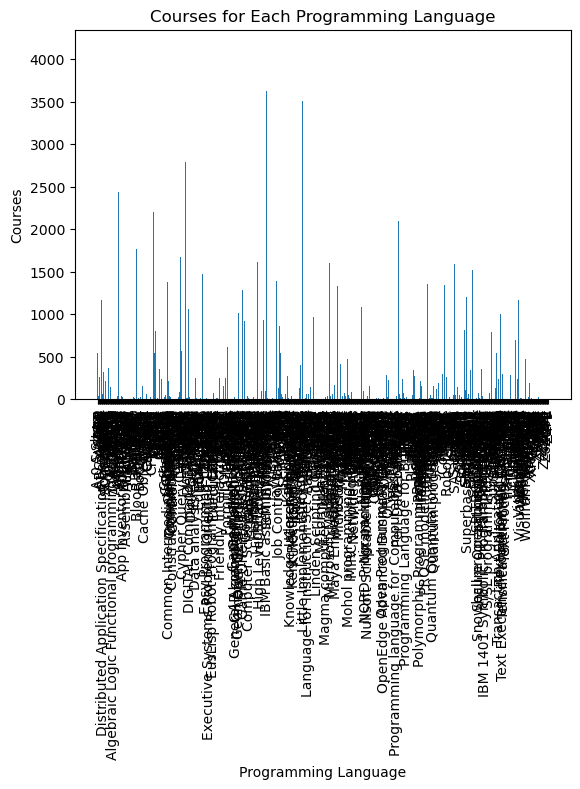

In [34]:
import matplotlib.pyplot as plt

# Bar chart
plt.bar(df['languages'], df['lang_courses'])
plt.xlabel('Programming Language')
plt.ylabel('Courses')
plt.title('Courses for Each Programming Language')
plt.xticks(rotation=90)
plt.show()


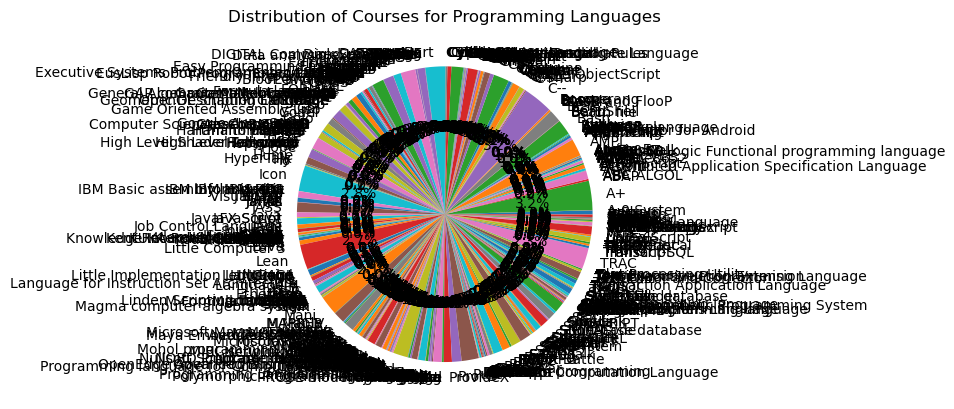

In [35]:
# Pie chart
plt.pie(df['lang_courses'], labels=df['languages'], autopct='%1.1f%%')
plt.title('Distribution of Courses for Programming Languages')
plt.show()

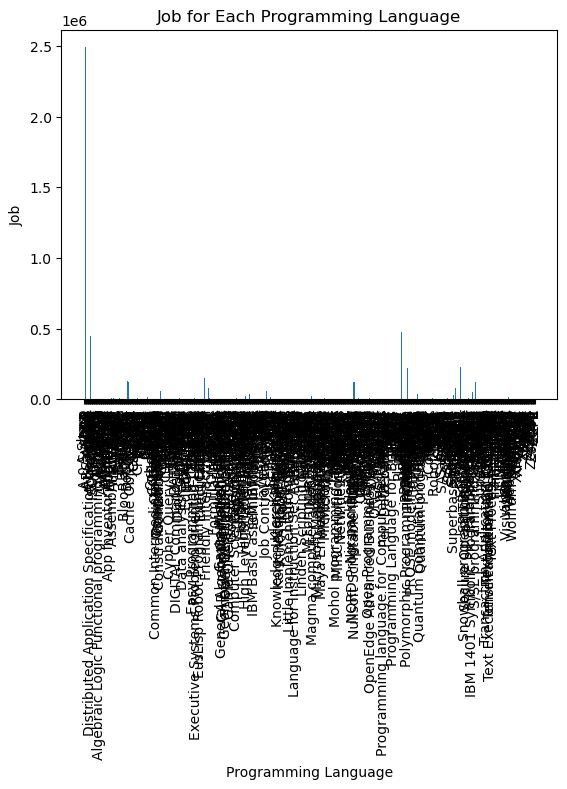

In [36]:


# Bar chart
plt.bar(df['languages'], df['lang_job'])
plt.xlabel('Programming Language')
plt.ylabel('Job')
plt.title('Job for Each Programming Language')
plt.xticks(rotation=90)
plt.show()


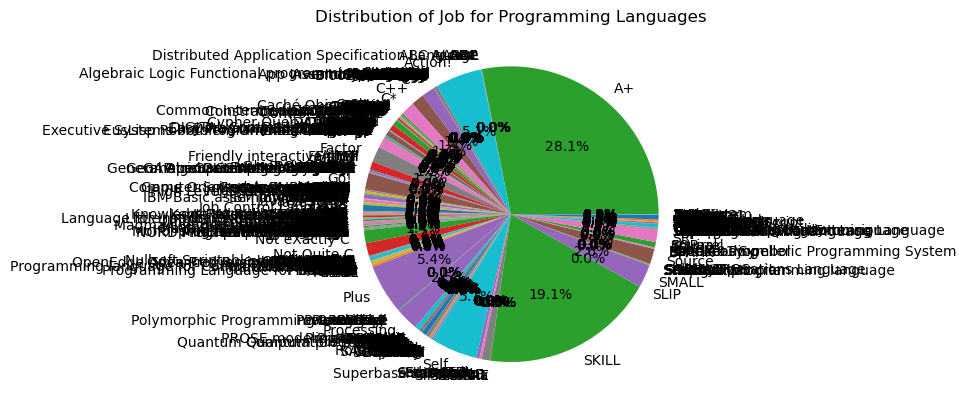

In [37]:
# Pie chart
plt.pie(df['lang_job'], labels=df['languages'], autopct='%1.1f%%')
plt.title('Distribution of Job for Programming Languages')
plt.show()

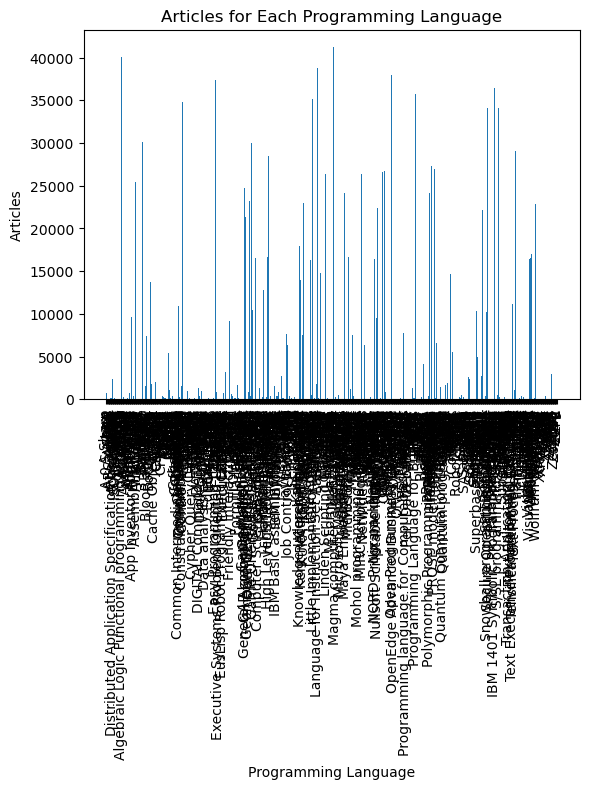

In [38]:


# Bar chart
plt.bar(df['languages'], df['lang_articles'])
plt.xlabel('Programming Language')
plt.ylabel('Articles')
plt.title('Articles for Each Programming Language')
plt.xticks(rotation=90)
plt.show()


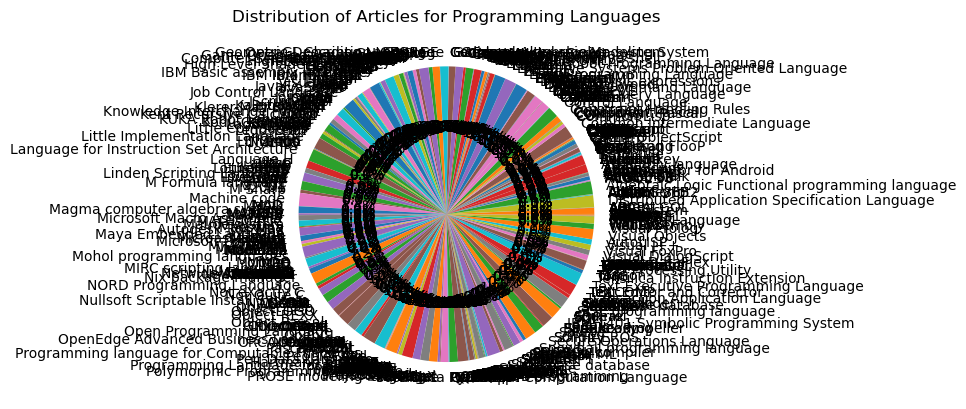

In [39]:
# Pie chart
plt.pie(df['lang_articles'], labels=df['languages'], autopct='%1.1f%%')
plt.title('Distribution of Articles for Programming Languages')
plt.show()

In [40]:
#מטריצת המתאם משרתת את המטרה לספק תצוגה מקיפה של המתאמים הזוגיים בין משתנים מרובים במערך נתונים.
#זה מאפשר לך לנתח את הקשרים והתלות בין משתנים אלה.
# Select the relevant columns for correlation analysis
columns_of_interest = [[ 'articles_num_on_cp', 'Technical_Blogs_num_on_cp',
       'Tips_and_Tricks_num_on_cp', 'Reference_Articles_num_on_cp',
       'Projects_num_on_cp', 'Assets_num_on_cp', 'Questions_num_on_cp',
       'Answers_num_on_cp', 'Forum_Messages_num_on_cp',
       'courses_num_on_codecademy', 'articles_num_on_codecademy',
       'docs_num_on_codecademy', 'cours_num_on_edx', 'job_num_on_id',
       'articles_num_on_spectrum', 'job_num_on_gd']]

# Calculate the correlation matrix
correlation_matrix = df[['articles_num_on_cp', 'Technical_Blogs_num_on_cp',
       'Tips_and_Tricks_num_on_cp', 'Reference_Articles_num_on_cp',
       'Projects_num_on_cp', 'Assets_num_on_cp', 'Questions_num_on_cp',
       'Answers_num_on_cp', 'Forum_Messages_num_on_cp',
       'courses_num_on_codecademy', 'articles_num_on_codecademy',
       'docs_num_on_codecademy', 'cours_num_on_edx', 'job_num_on_id',
       'articles_num_on_spectrum', 'job_num_on_gd']].corr()

# Print the correlation matrix
correlation_matrix


articles_num_on_cp  Technical_Blogs_num_on_cp  \
articles_num_on_cp                      1.000000                   0.151812   
Technical_Blogs_num_on_cp               0.151812                   1.000000   
Tips_and_Tricks_num_on_cp               0.241298                   0.037304   
Reference_Articles_num_on_cp            0.108302                   0.004518   
Projects_num_on_cp                      0.055021                   0.016376   
Assets_num_on_cp                       -0.013212                   0.007418   
Questions_num_on_cp                     0.890357                   0.186204   
Answers_num_on_cp                       0.866802                   0.190126   
Forum_Messages_num_on_cp                0.687000                   0.055020   
courses_num_on_codecademy               0.190399                   0.002719   
articles_num_on_codecademy              0.060283                  -0.010362   
docs_num_on_codecademy                  0.021639                  -0.011904   
cours_num_on_edx                       -0.097670                  -0.020259   
job_num_on_id                           0.012426                  -0.002313   
articles_num_on_spectrum                0.092920                   0.004633   
job_num_on_gd                          -0.003606                  -0.002321   

                              Tips_and_Tricks_num_on_cp  \
articles_num_on_cp                             0.241298   
Technical_Blogs_num_on_cp                      0.037304   
Tips_and_Tricks_num_on_cp                      1.000000   
Reference_Articles_num_on_cp                   0.016559   
Projects_num_on_cp                             0.038249   
Assets_num_on_cp                               0.026515   
Questions_num_on_cp                            0.211076   
Answers_num_on_cp                              0.205826   
Forum_Messages_num_on_cp                       0.166901   
courses_num_on_codecademy                      0.035296   
articles_num_on_codecademy                    -0.006657   
docs_num_on_codecademy                        -0.014852   
cours_num_on_edx                              -0.037769   
job_num_on_id                                 -0.006065   
articles_num_on_spectrum                       0.014493   
job_num_on_gd                                 -0.004681   

                              Reference_Articles_num_on_cp  \
articles_num_on_cp                                0.108302   
Technical_Blogs_num_on_cp                         0.004518   
Tips_and_Tricks_num_on_cp                         0.016559   
Reference_Articles_num_on_cp                      1.000000   
Projects_num_on_cp                                0.014692   
Assets_num_on_cp                                  0.008636   
Questions_num_on_cp                               0.038504   
Answers_num_on_cp                                 0.023390   
Forum_Messages_num_on_cp                          0.050249   
courses_num_on_codecademy                        -0.002152   
articles_num_on_codecademy                       -0.012889   
docs_num_on_codecademy                           -0.006426   
cours_num_on_edx                                 -0.012792   
job_num_on_id                                    -0.006478   
articles_num_on_spectrum                         -0.006147   
job_num_on_gd                                    -0.003407   

                              Projects_num_on_cp  Assets_num_on_cp  \
articles_num_on_cp                      0.055021         -0.013212   
Technical_Blogs_num_on_cp               0.016376          0.007418   
Tips_and_Tricks_num_on_cp               0.038249          0.026515   
Reference_Articles_num_on_cp            0.014692          0.008636   
Projects_num_on_cp                      1.000000          0.853463   
Assets_num_on_cp                        0.853463          1.000000   
Questions_num_on_cp                     0.054838         -0.006989   
Answers_num_on_cp                       0.050758         -0.008041 

In [41]:
df['MaxResults'] = df.iloc[:, 1:].max(axis=1)
df['MinResults'] = df.iloc[:, 1:].min(axis=1)
df['AvgResults'] = df.iloc[:, 1:].mean(axis=1)


In [42]:
# Sort the DataFrame by 'TotalResults' in descending order
df_sorted = df.sort_values('all_search', ascending=False)

# Print the top 5 programming languages with the highest total results
df_sorted.head(5)


languages  articles_num_on_cp  \
204                General Algebraic Modeling System               24718   
2                                                 A+                  48   
445    Programming language for Computable Functions               39999   
22   Algebraic Logic Functional programming language               40077   
609              Text Executive Programming Language               39304   

     Technical_Blogs_num_on_cp  Tips_and_Tricks_num_on_cp  \
204                       4800                       3744   
2                            7                          4   
445                       7345                       8639   
22                        7410                       8641   
609                       7231                       8645   

     Reference_Articles_num_on_cp  Projects_num_on_cp  Assets_num_on_cp  \
204                            27                  73                 0   
2                               0                   0                 0   
445                            34                  97                 1   
22                             32                  96                 1   
609                            35                  92                 1   

     Questions_num_on_cp  Answers_num_on_cp  Forum_Messages_num_on_cp  ...  \
204                37332              44073                   4716417  ...   
2                    145                 67                       361  ...   
445               228413             329924                   1628686  ...   
22                227246             329815                   1559896  ...   
609               233305             330245                   1533677  ...   

     job_num_on_id  articles_num_on_spectrum  job_num_on_gd  lang_courses  \
204              0                        19           20.0           8.0   
2               25                         0      2490497.0        4110.0   
445              0                       212            4.0          37.0   
22               0                         4            0.0           2.0   
609              0                        51            2.0           5.0   

     lang_articles   lang_job  all_search  MaxResults  MinResults  \
204        24738.0       20.0   4831233.0   4831233.0         0.0   
2            298.0  2490522.0   2495764.0   2495764.0         0.0   
445        40212.0        4.0   2243393.0   2243393.0         0.0   
22         40084.0        0.0   2173224.0   2173224.0         0.0   
609        39362.0        2.0   2152601.0   2152601.0         0.0   

        AvgResults  
204  659930.227273  
2    453737.363636  
445  307746.909091  
22   298170.818182  
609  295326.000000  

[5 rows x 24 columns]

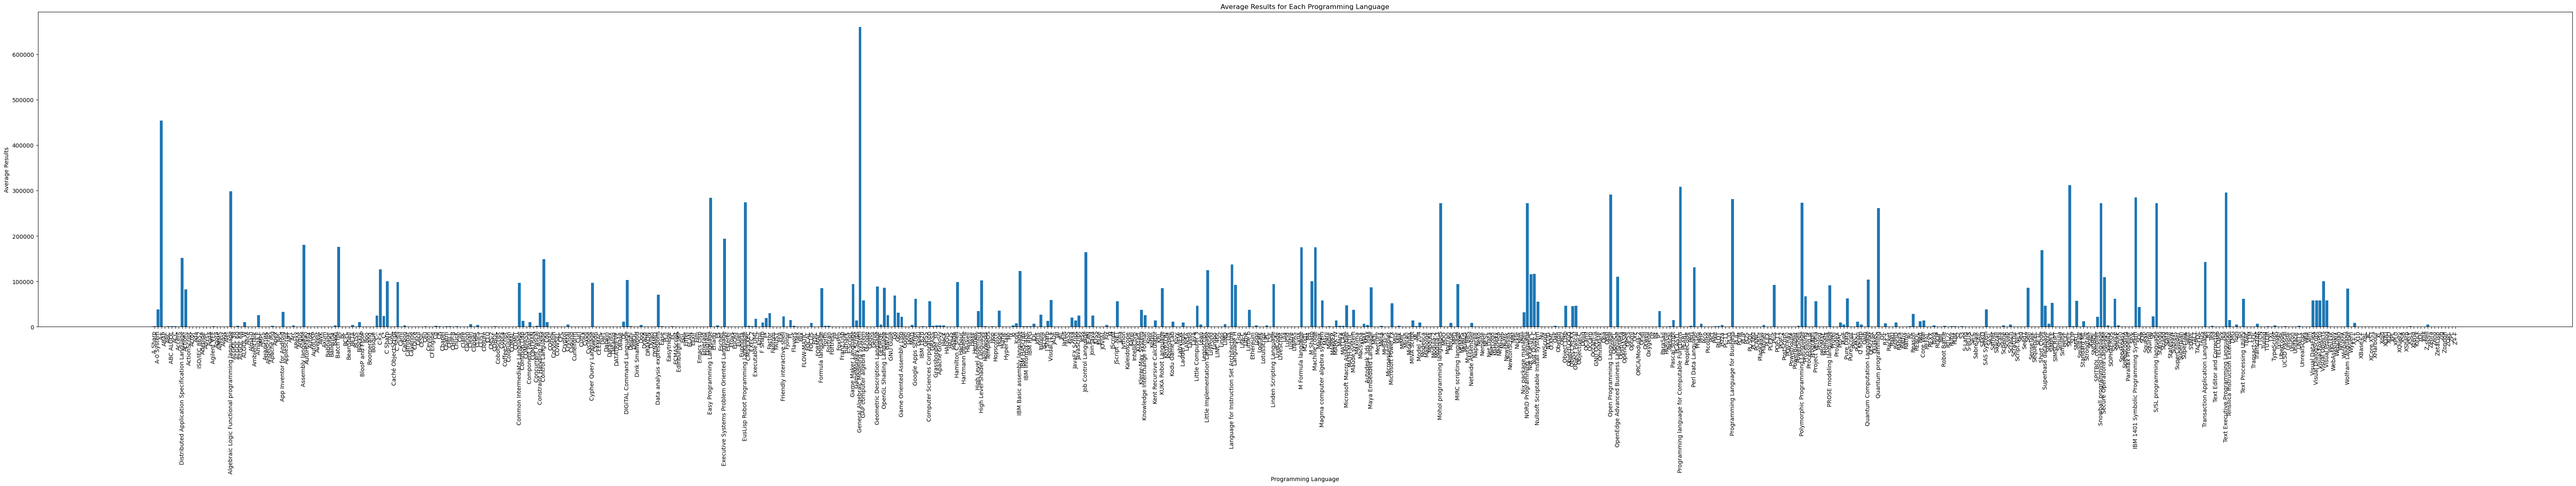

In [43]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize the average results for each language
plt.figure(figsize=(80, 10))
plt.bar(df['languages'], df['AvgResults'])
plt.xlabel('Programming Language')
plt.ylabel('Average Results')
plt.title('Average Results for Each Programming Language')
plt.xticks(rotation=90)
plt.show()


In [44]:
# Calculate the correlation between 'AvgResults' and 'GitHubQuestions'
correlation = df['AvgResults'].corr(df['lang_courses'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation)


Correlation Coefficient: 0.04418741718983606


In [45]:
# Calculate the correlation between 'AvgResults' and 'GitHubQuestions'
correlation = df['AvgResults'].corr(df['lang_articles'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation)


Correlation Coefficient: 0.7613592488842911


In [46]:
# Calculate the correlation between 'AvgResults' and 'GitHubQuestions'
correlation = df['AvgResults'].corr(df['lang_job'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation)


Correlation Coefficient: 0.36636676411659475


In [67]:
# מיון המידע מהגדול לקטן לפי העמדות המסכמות
df_sorted = df.sort_values(by=[ 'lang_courses', 'lang_articles','lang_job'], axis=0, ascending=False)

# Add rank column
df_sorted['Rank'] = range(1, len(df_sorted) + 1)
df_sorted = df_sorted
# Print the updated DataFrame
df_sorted


languages  articles_num_on_cp  Technical_Blogs_num_on_cp  \
64        C--                   5                          2   
2          A+                  48                          7   
249      Icon                3802                        444   
303      Lean                 254                         78   
616      TRAC                   5                          1   
..        ...                 ...                        ...   
601    TACPOL                   0                          0   
643    WATFIV                   0                          0   
659     XOTcl                   0                          0   
660       XOD                   0                          0   
668    Yorick                   0                          1   

     Tips_and_Tricks_num_on_cp  Reference_Articles_num_on_cp  \
64                           0                             0   
2                            4                             0   
249                        341                             2   
303                         16                             0   
616                          0                             0   
..                         ...                           ...   
601                          0                             0   
643                          0                             0   
659                          0                             0   
660                          0                             0   
668                          0                             0   

     Projects_num_on_cp  Assets_num_on_cp  Questions_num_on_cp  \
64                    0                 0                   19   
2                     0                 0                  145   
249                   6                 0                 2477   
303                   0                 0                   55   
616                   0                 0                   12   
..                  ...               ...                  ...   
601                   0                 0                    0   
643                   0                 0                    0   
659                   0                 0                    0   
660                   0                 0                    0   
668                   0                 0                    0   

     Answers_num_on_cp  Forum_Messages_num_on_cp  ...  \
64                  13                        33  ...   
2                   67                       361  ...   
249               1678                     36371  ...   
303                131                      3817  ...   
616                 22                       288  ...   
..                 ...                       ...  ...   
601                  0                         0  ...   
643                  0                        15  ...   
659                  0                         0  ...   
660                  0                         0  ...   
668                  0                         9  ...   

     articles_num_on_spectrum  job_num_on_gd  lang_courses  lang_articles  \
64                       1817       124436.0        4140.0         1859.0   
2                           0      2490497.0        4110.0          298.0   
249                       445          874.0        3630.0         4283.0   
303                       283        19531.0        3514.0          538.0   
616                         8          254.0        2976.0           71.0   
..                        ...            ...           ...            ...   
601                         0            0.0           0.0            0.0   
643                         0            0.0           0.0            0.0   
659                         0            0.0           0.0            0.0   
660                         0            0.0           0.0            0.0   
668                         0            0.0           0.0            0.0   

      lang_job  all_search  MaxResults  MinResults     AvgResul

<AxesSubplot:>

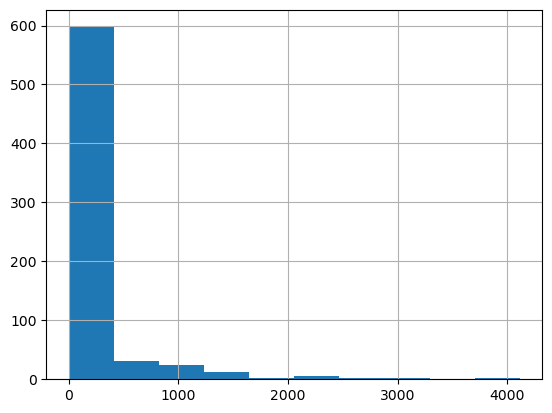

In [48]:
df.cours_num_on_edx.hist()

<AxesSubplot:>

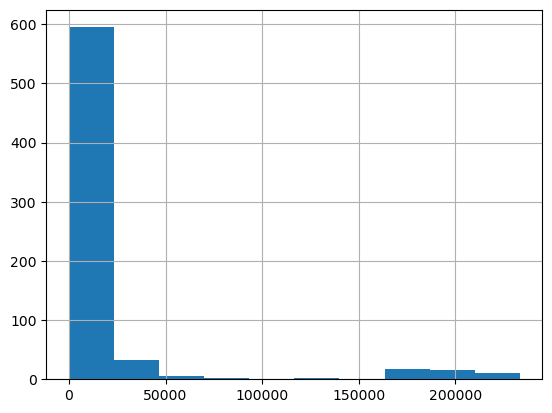

In [49]:
df.Questions_num_on_cp.hist()

<AxesSubplot:>

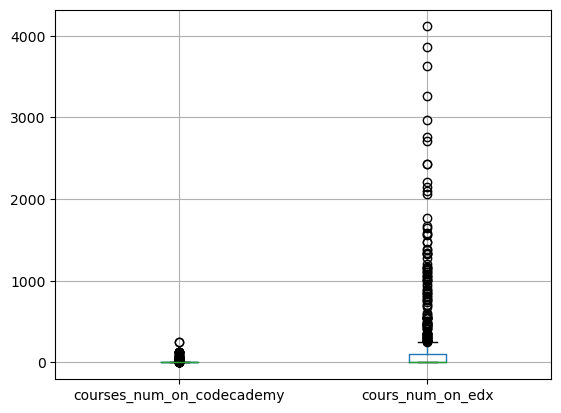

In [50]:
# זה עוזר לך להבין את טווח הערכים, לזהות הבדלים או קווי דמיון בהתפלגויות ולזהות חריגים פוטנציאליים שעשויים להתקיים בנתונים.
df.boxplot(column=['courses_num_on_codecademy', 'cours_num_on_edx'])


<AxesSubplot:>

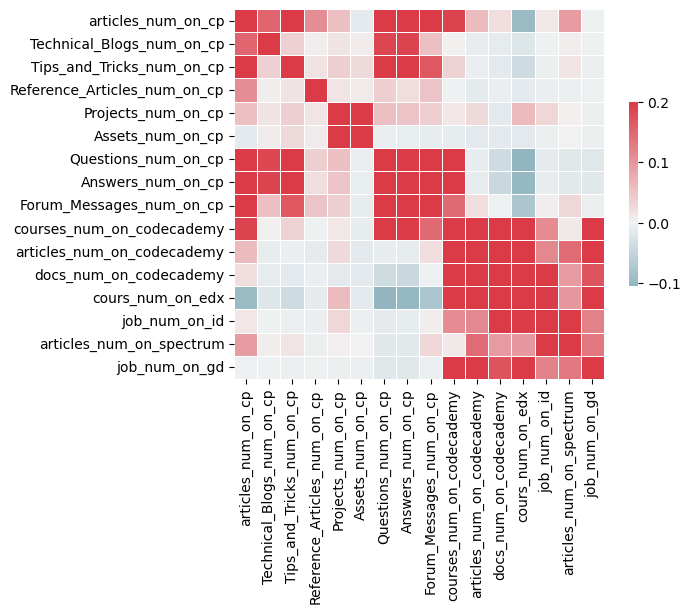

In [51]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['articles_num_on_cp', 'Technical_Blogs_num_on_cp',
       'Tips_and_Tricks_num_on_cp', 'Reference_Articles_num_on_cp',
       'Projects_num_on_cp', 'Assets_num_on_cp', 'Questions_num_on_cp',
       'Answers_num_on_cp', 'Forum_Messages_num_on_cp',
       'courses_num_on_codecademy', 'articles_num_on_codecademy',
       'docs_num_on_codecademy', 'cours_num_on_edx', 'job_num_on_id',
       'articles_num_on_spectrum', 'job_num_on_gd']].corr(),vmax=.2, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [52]:
mycols = ['articles_num_on_cp', 'Technical_Blogs_num_on_cp',
       'Tips_and_Tricks_num_on_cp', 'Reference_Articles_num_on_cp',
       'Projects_num_on_cp', 'Assets_num_on_cp', 'Questions_num_on_cp',
       'Answers_num_on_cp', 'Forum_Messages_num_on_cp',
       'courses_num_on_codecademy', 'articles_num_on_codecademy',
       'docs_num_on_codecademy', 'cours_num_on_edx', 'job_num_on_id',
       'articles_num_on_spectrum', 'job_num_on_gd']
all_outlier_rows = []
for col in mycols:        
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        IQR_range = 1.5 * IQR
        col_outlier = df[(df[col] < Q1 - IQR_range) | 
                              (df[col] > Q3 + IQR_range )].index
        all_outlier_rows.extend(col_outlier)  
len(all_outlier_rows)


2043

In [53]:
len(set(all_outlier_rows))

392

In [54]:
z_score = (df["job_num_on_id"] - df["job_num_on_id"].mean()) / df["job_num_on_id"].std()
print(z_score)

0      0.192521
1     -0.164434
2     -0.085462
3      0.072483
4     -0.132845
         ...   
675   -0.164434
676   -0.164434
677   -0.164434
678   -0.164434
679    0.123025
Name: job_num_on_id, Length: 680, dtype: float64


In [55]:
outliers = abs(z_score) > 3
sum(outliers)

10

In [57]:
min(df.job_num_on_id[outliers])

1093

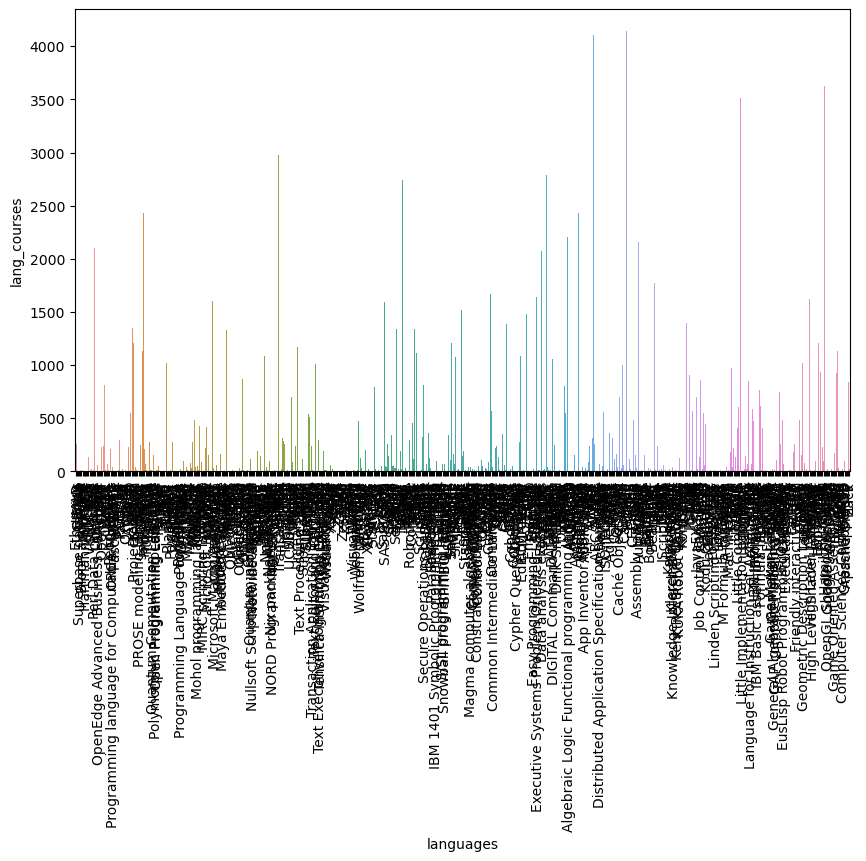

In [58]:


plt.figure(figsize=(10, 6))  

# בחירת העמודות הרלוונטיות לתרשים
columns = ['languages', 'lang_courses', 'lang_articles']

# יצירת DataFrame חדש עם העמודות הרלוונטיות
df_plot = df[columns]

# קביעת סדר הצגת השפות בתוך התרשים
order = df_plot['languages'].value_counts().index

# יצירת תרשים עמודות
sns.barplot(x='languages', y='lang_courses', data=df_plot, order=order)

# הצגת התוויות בזווית 90 מעלות
plt.xticks(rotation=90)

# שמירת התמונה
plt.savefig('lang_courses.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()


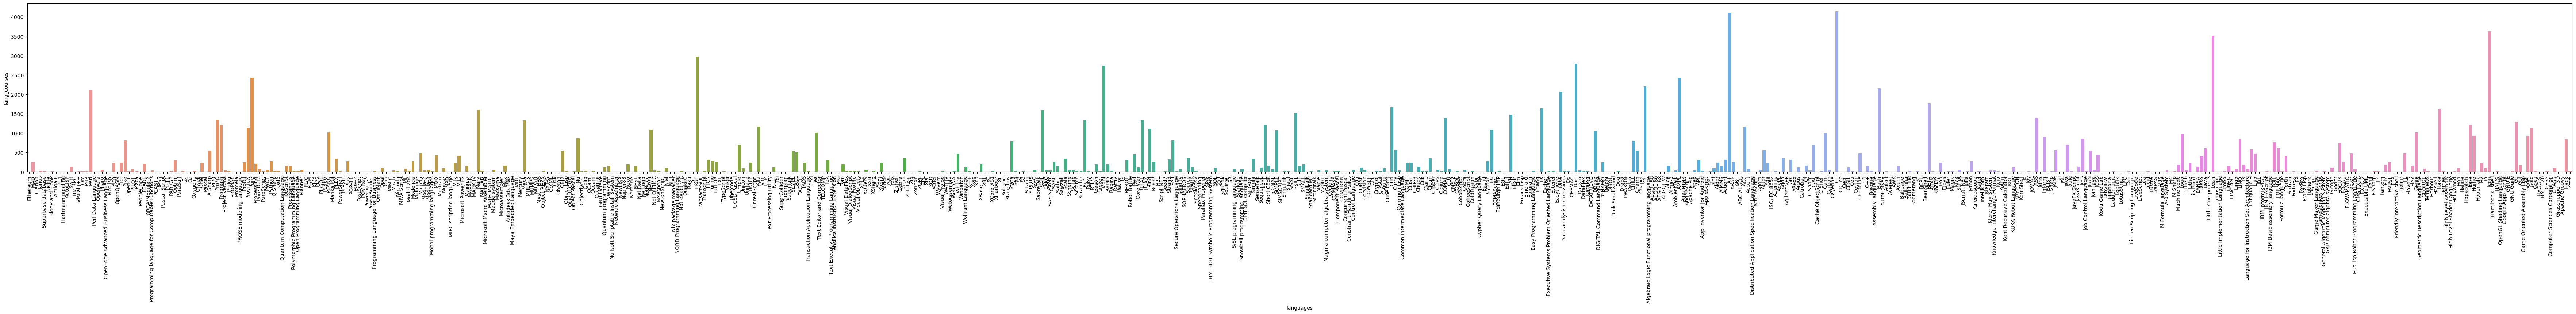

In [59]:

plt.figure(figsize=(90, 6))

# בחירת העמודות הרלוונטיות לתרשים
columns = ['languages', 'lang_courses', 'lang_articles']

# יצירת DataFrame חדש עם העמודות הרלוונטיות
df_plot = df[columns]

# קביעת סדר הצגת השפות בתוך התרשים
order = df_plot['languages'].value_counts().index

# יצירת תרשים עמודות
sns.barplot(x='languages', y='lang_courses', data=df_plot, order=order)

# הצגת התוויות בזווית 90 מעלות
plt.xticks(rotation=90)

# שמירת התמונה
plt.savefig('lang_courses.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()


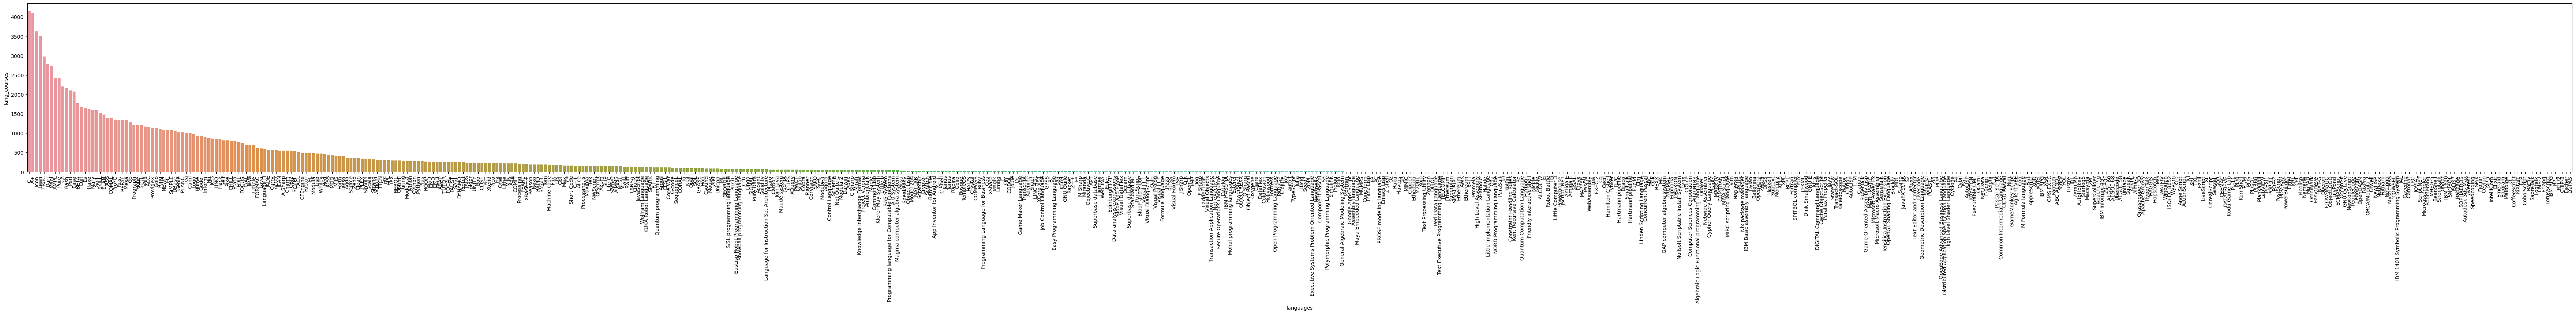

In [60]:

df_sorted = df.sort_values(by=['lang_courses'], ascending=False)

plt.figure(figsize=(90, 6))

columns = ['languages', 'lang_courses', 'lang_articles']
df_plot = df_sorted[columns]

order = df_sorted['languages']

sns.barplot(x='languages', y='lang_courses', data=df_plot, order=order)

plt.xticks(rotation=90)
plt.savefig('lang_courses_sort.png', dpi=300, bbox_inches='tight', facecolor='w')

plt.show()


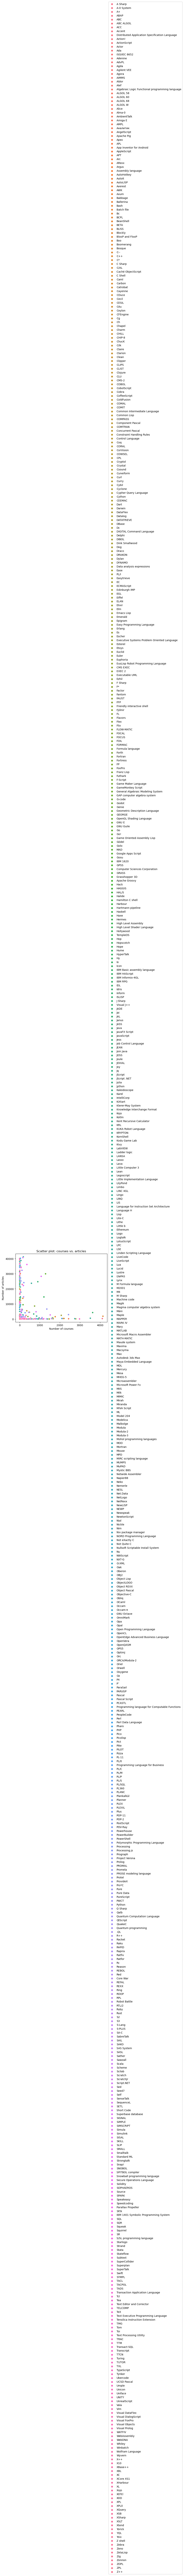

In [61]:

# תרשים פיזור של שתי עמודות מול בחירת שפה
sns.scatterplot(x='lang_courses', y='lang_articles', hue='languages', data=df)
plt.title('Scatter plot: courses vs. articles')
plt.xlabel('Number of courses')
plt.ylabel('Number of articles')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('lang_courses_lang_articles.png', dpi=300, bbox_inches='tight', facecolor='w')

plt.show()


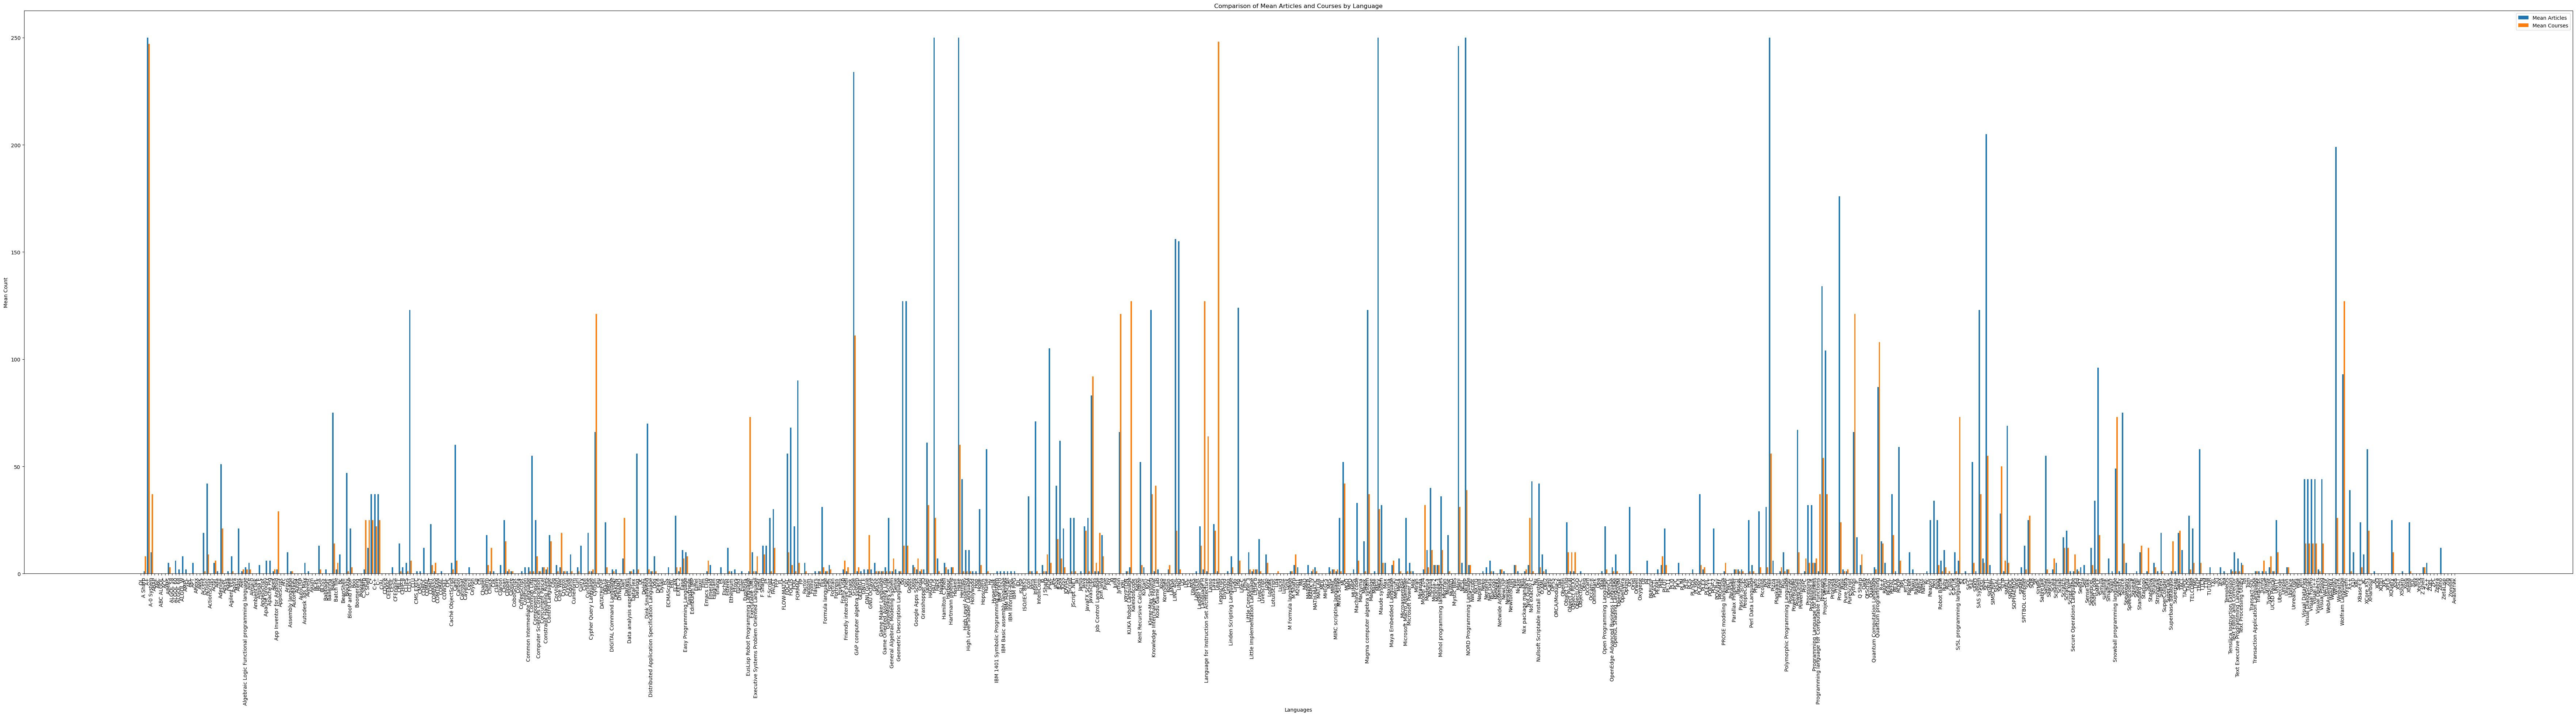

In [62]:

# הפיכת העמודה 'language' לעמודת קטגוריה
df['languages'] = df['languages'].astype('category')
plt.figure(figsize=(90,20))  

# חישוב ממוצע מספר המאמרים והקורסים לפי שפה
mean_articles = df.groupby('languages')['articles_num_on_codecademy'].mean()
mean_courses = df.groupby('languages')['courses_num_on_codecademy'].mean()

# יצירת תרשים עמודתי להשוואת ממוצע מספר המאמרים והקורסים לפי שפה
x = np.arange(len(mean_articles))

plt.bar(x, mean_articles, width=0.4, label='Mean Articles')
plt.bar(x + 0.4, mean_courses, width=0.4, label='Mean Courses')
plt.xlabel('Languages')
plt.ylabel('Mean Count')
plt.title('Comparison of Mean Articles and Courses by Language')
plt.xticks(x, mean_articles.index)
plt.legend()
plt.xticks(rotation=90)
plt.savefig('lang_courses_lang_articles2.png', dpi=300, bbox_inches='tight', facecolor='w')

plt.show()


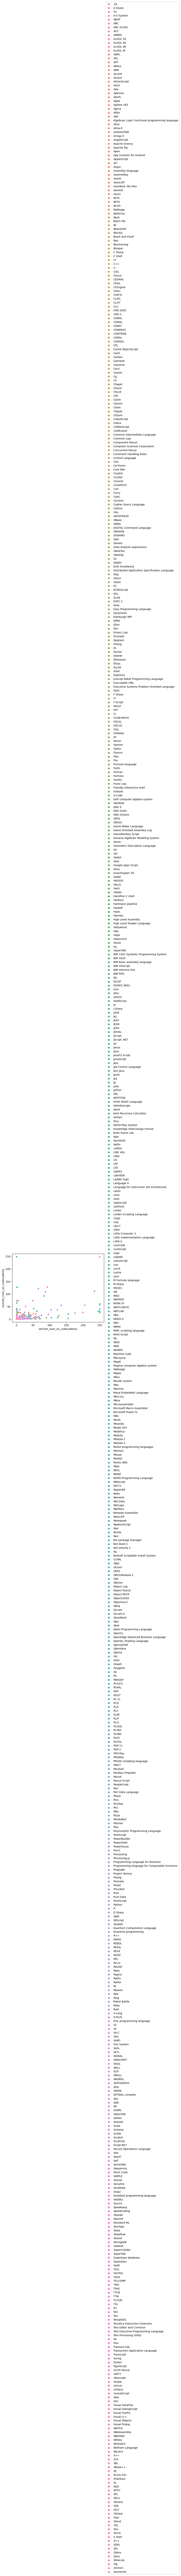

In [63]:

sns.scatterplot(x='articles_num_on_codecademy', y='courses_num_on_codecademy', hue='languages', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('courses_articles_codecademy.png', dpi=300, bbox_inches='tight', facecolor='w')



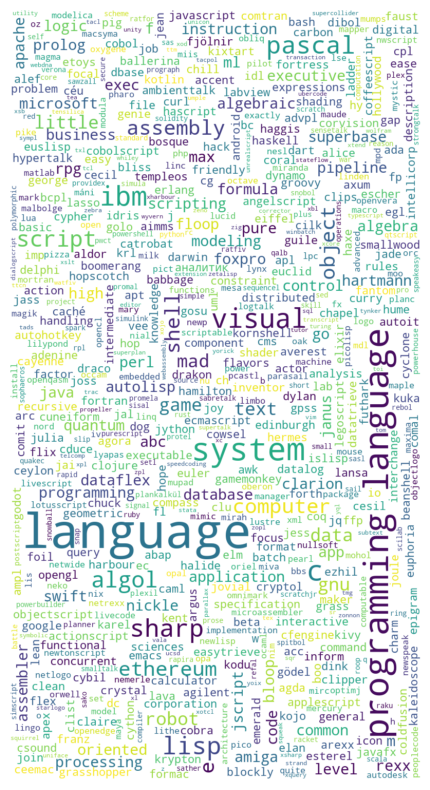

In [64]:
words = " ".join([str(value) for value in df['languages'] if isinstance(value, str)])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
#plt.imshow(interpolation="bilinear")
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('languages.png', dpi=300, bbox_inches='tight', facecolor='w')

plt.show()

In [68]:
df_sorted.columns

Index(['languages', 'articles_num_on_cp', 'Technical_Blogs_num_on_cp',
       'Tips_and_Tricks_num_on_cp', 'Reference_Articles_num_on_cp',
       'Projects_num_on_cp', 'Assets_num_on_cp', 'Questions_num_on_cp',
       'Answers_num_on_cp', 'Forum_Messages_num_on_cp',
       'courses_num_on_codecademy', 'articles_num_on_codecademy',
       'docs_num_on_codecademy', 'cours_num_on_edx', 'job_num_on_id',
       'articles_num_on_spectrum', 'job_num_on_gd', 'lang_courses',
       'lang_articles', 'lang_job', 'all_search', 'MaxResults', 'MinResults',
       'AvgResults', 'Rank'],
      dtype='object')

In [69]:
X = df_sorted[['articles_num_on_cp', 'Technical_Blogs_num_on_cp',
       'Tips_and_Tricks_num_on_cp', 'Reference_Articles_num_on_cp',
       'Projects_num_on_cp', 'Assets_num_on_cp', 'Questions_num_on_cp',
       'Answers_num_on_cp', 'Forum_Messages_num_on_cp',
       'courses_num_on_codecademy', 'articles_num_on_codecademy',
       'docs_num_on_codecademy', 'cours_num_on_edx', 'job_num_on_id',
       'articles_num_on_spectrum', 'job_num_on_gd']]  # Input features (search results for each site)

y = df_sorted['all_search']  # Target variable
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_true = df_sorted['Rank']


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# פיצול הנתונים למערך האימון ולמערך הבדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת המודל ואימוןו על מערך האימון
model = LinearRegression()
model.fit(X_train, y_train)

# חיזוי התוצאות על מערך הבדיקה
y_pred = model.predict(X_test)

# חישוב ה-MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 1.2306417698618667e-09


In [71]:
from sklearn.model_selection import train_test_split

# פיצול הנתונים לשלושה סטים: אימון, ביצוע ובדיקה
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# הדפסת גודל הסטים
print("גודל סט האימון:", len(X_train))
print("גודל סט הביצוע:", len(X_val))
print("גודל סט הבדיקה:", len(X_test))


גודל סט האימון: 476
גודל סט הביצוע: 102
גודל סט הבדיקה: 102


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# יצירת המודל ואימוןו על סט האימון
model = LinearRegression()
model.fit(X_train, y_train)

# חיזוי התוצאות על סט הבדיקה
y_pred = model.predict(X_test)

# חישוב והדפסת ערכי ה-MAE וה-R2
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 6.327444505168928e-10
R-squared (R2): 1.0
